> ## About Dataset
> ### Context
>>"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." 
>>
>Content
>>Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
>
> **The data set includes information about:**
>>- Customers who left within the last month – the column is called Churn
>>
>>- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
>>- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
>>- Demographic info about customers – gender, age range, and if they have partners and dependents

### Importing libraries

In [37]:
import os 
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# for chi Square
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.feature_selection import SelectKBest
# for anova
from sklearn.feature_selection import f_classif
# Data Balancing
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score

### Importing Dataset 

Link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn?datasetId=13996&sortBy=voteCount

In [61]:
od.download('https://www.kaggle.com/datasets/blastchar/telco-customer-churn?datasetId=13996&sortBy=voteCount')

Skipping, found downloaded files in ".\telco-customer-churn" (use force=True to force download)


In [62]:
os.listdir('./telco-customer-churn')

['WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [79]:
df = pd.read_csv('./telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Data Analysis

In [80]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [81]:
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [82]:
print(f'The no. of rows and columns are {df.shape}.')

The no. of rows and columns are (7043, 21).


In [83]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [85]:
# Changing the dtype of TotalCharges and keeping the NaN value as itis.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

> ### Conclusion:
> 1. There are few null values in the column TotalCharges.
> 2. But the dtypes of somes columns are Objects so first we will have to deal with those before ML.

In [87]:
# Printinh all the NaN values in TotalCharges column.
df[df.TotalCharges.isna()]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

>- As we can see where the TotalCharges is NaN we can also see the tenure is also 0.
>- But we have to confor it first there are only 11, tenure which are zeros or more.

In [71]:
df[df.TotalCharges.isna()].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [72]:
df[df.tenure == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

> ### Conclusion:
>- From above we can conclude that where TotalCharges is NaN the tenure is also 0.
>- Now we will deal with the missing values of TotalCharges.

In [73]:
df.dropna(inplace=True)

In [74]:
df[df.TotalCharges.isna()].index

Int64Index([], dtype='int64')

In [76]:
df[df.tenure == 0].index

Int64Index([], dtype='int64')

In [77]:
df[df.TotalCharges.isna()]

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

In [15]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.head(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges  Churn  
0  Electronic check          29.85         29.85     No  
1      Mailed check          56.95       1889.50     No  
2      Mailed check          53.85        108.15    Yes  

[3 rows x 21 columns]

In [18]:
# Droping the column customerID
df.drop('customerID',axis = 1, inplace = True)

In [19]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2265.000258
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1400.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

>- Let's divide the features into numerical and categorical features.
>- We will also execute the label encoding transformation for categorical features.

In [31]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [24]:
col = list(df.columns)
categorical_feat = [ ]
numerical_feat = [ ]

for i in col:
    if len(df[i].unique()) > 4:
        numerical_feat.append(i)
        
    else:
        categorical_feat.append(i)
        
        
print(f'Categorical Features : {categorical_feat}')
print(f'Numerical Features : {numerical_feat}')

Categorical Features : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical Features : ['tenure', 'MonthlyCharges', 'TotalCharges']


### Target Variable Visualization

>- What is the distribution of customer churn in the dataset?
>>  - The distribution of churn is 26.5% with respect to no-churn 73.5%.

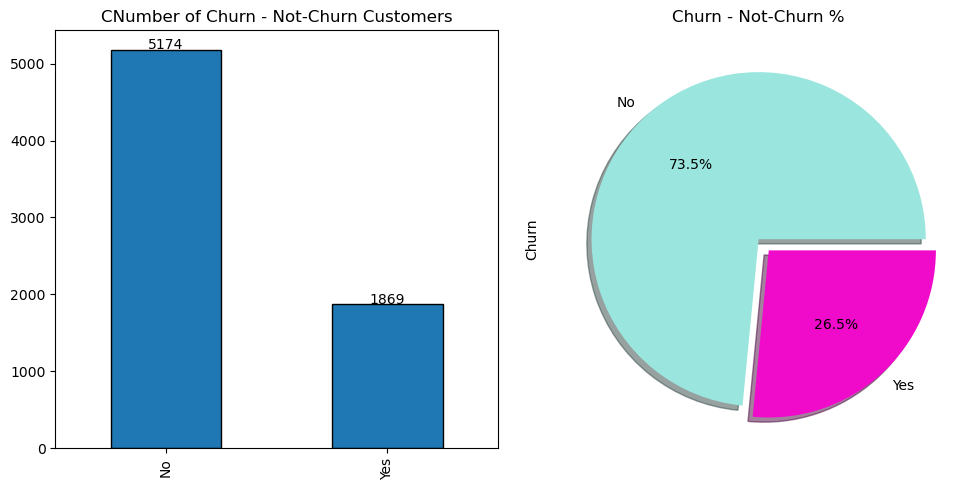

In [21]:
# calculate churn ratio
churn_ratio = df['Churn'].value_counts(normalize=True) * 100

# create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
colors = ['#9ae6de', '#f00ac9']
# get values counts
counts = df.Churn.value_counts()

# plot the bar chart on the first axis
counts.plot(kind='bar', ax=axs[0], edgecolor = 'black')
axs[0].set_title('CNumber of Churn - Not-Churn Customers')

# Add total counts as text inside the bars:
for i, count in enumerate(counts):
    axs[0].text(i, count+10,count, ha = 'center')


# plot the pie chart on the second axis
df.Churn.value_counts().plot(kind='pie', ax=axs[1], autopct='%1.1f%%', explode=(0,0.09), shadow = True, colors = colors)
axs[1].set_title('Churn - Not-Churn %')

# adjust the layout
plt.tight_layout()

# show the plot
plt.show()


>- We can easily see that our data is unbalance 
>- So firstly we have to balance that data and then we can move on to work furthere or our data visualization and ML model will give us the wrong prediction.

### Droping off the Categorical column / Target column (Churn)
>- We will do this so that we can do better visualization with the Target column.

In [22]:
categorical_feat.remove("Churn")


### Now we will create some groups of columns according to the given Dataset.
>- Group 1 --> Demographic info about customers – gender, age range, and if they have partners and dependents
>- Group 2 --> Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
>- Group 3 --> Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

In [23]:
g1 = ['gender','SeniorCitizen','Partner', 'Dependents']
g2 = ['PhoneService','MultipleLines','InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection',
      'TechSupport','StreamingTV','StreamingMovies',]
g3 = ['Contract','PaperlessBilling','PaymentMethod']

**Group 1**\
**Demographic info about customers**

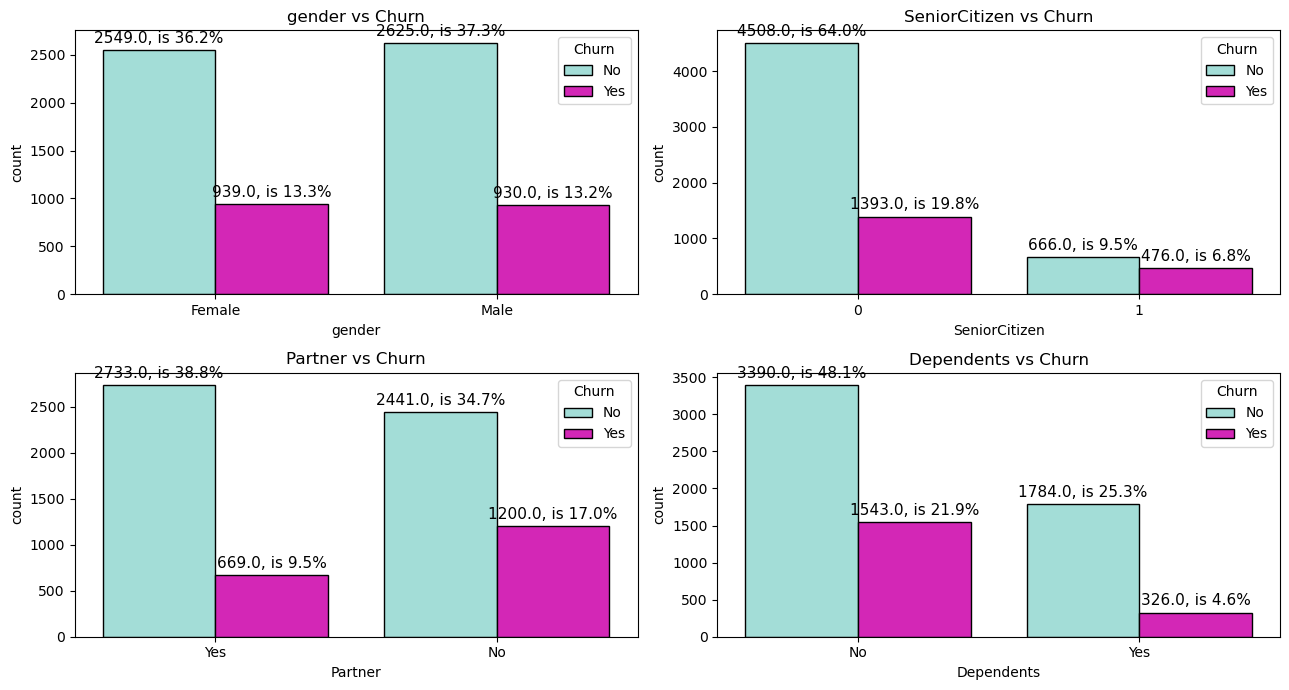

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13,7))

colors = ['#9ae6de', '#f00ac9']

for ax, col in zip(axes.flat, g1):
    sns.countplot(x=col, hue='Churn', data=df, palette=colors, edgecolor='black', ax=ax)
    ax.set_title(f'{col} vs Churn')
    ax.set_xlabel(col)
    ax.legend(title='Churn', loc='upper right')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}, is {height/len(df)*100:.1f}%', 
                    xy=(p.get_x() + p.get_width()/2, height), 
                    xytext=(0, 3), 
                    textcoords='offset points', 
                    ha='center', va='bottom', 
                    fontsize=11)
plt.tight_layout()

>- The rate of customer churn appears to be consistent across genders, with both male and female customers exhibiting similar levels of churn. 
>  
>- Furthermore, there is a relatively small proportion of Senior Citizen customers, and among them, approximately 40% have churned. This amounts to a total of 476 churned customers out of 1142 who are Senior Citizens.
>
>- Customers who live with a partner are less likely to churn compared to those who do not reside with a partner. On the other hand, customers who do not have dependents are more likely to churn compared to those who have dependents.

**Group 2**\
**Services that each customer has signed up for**

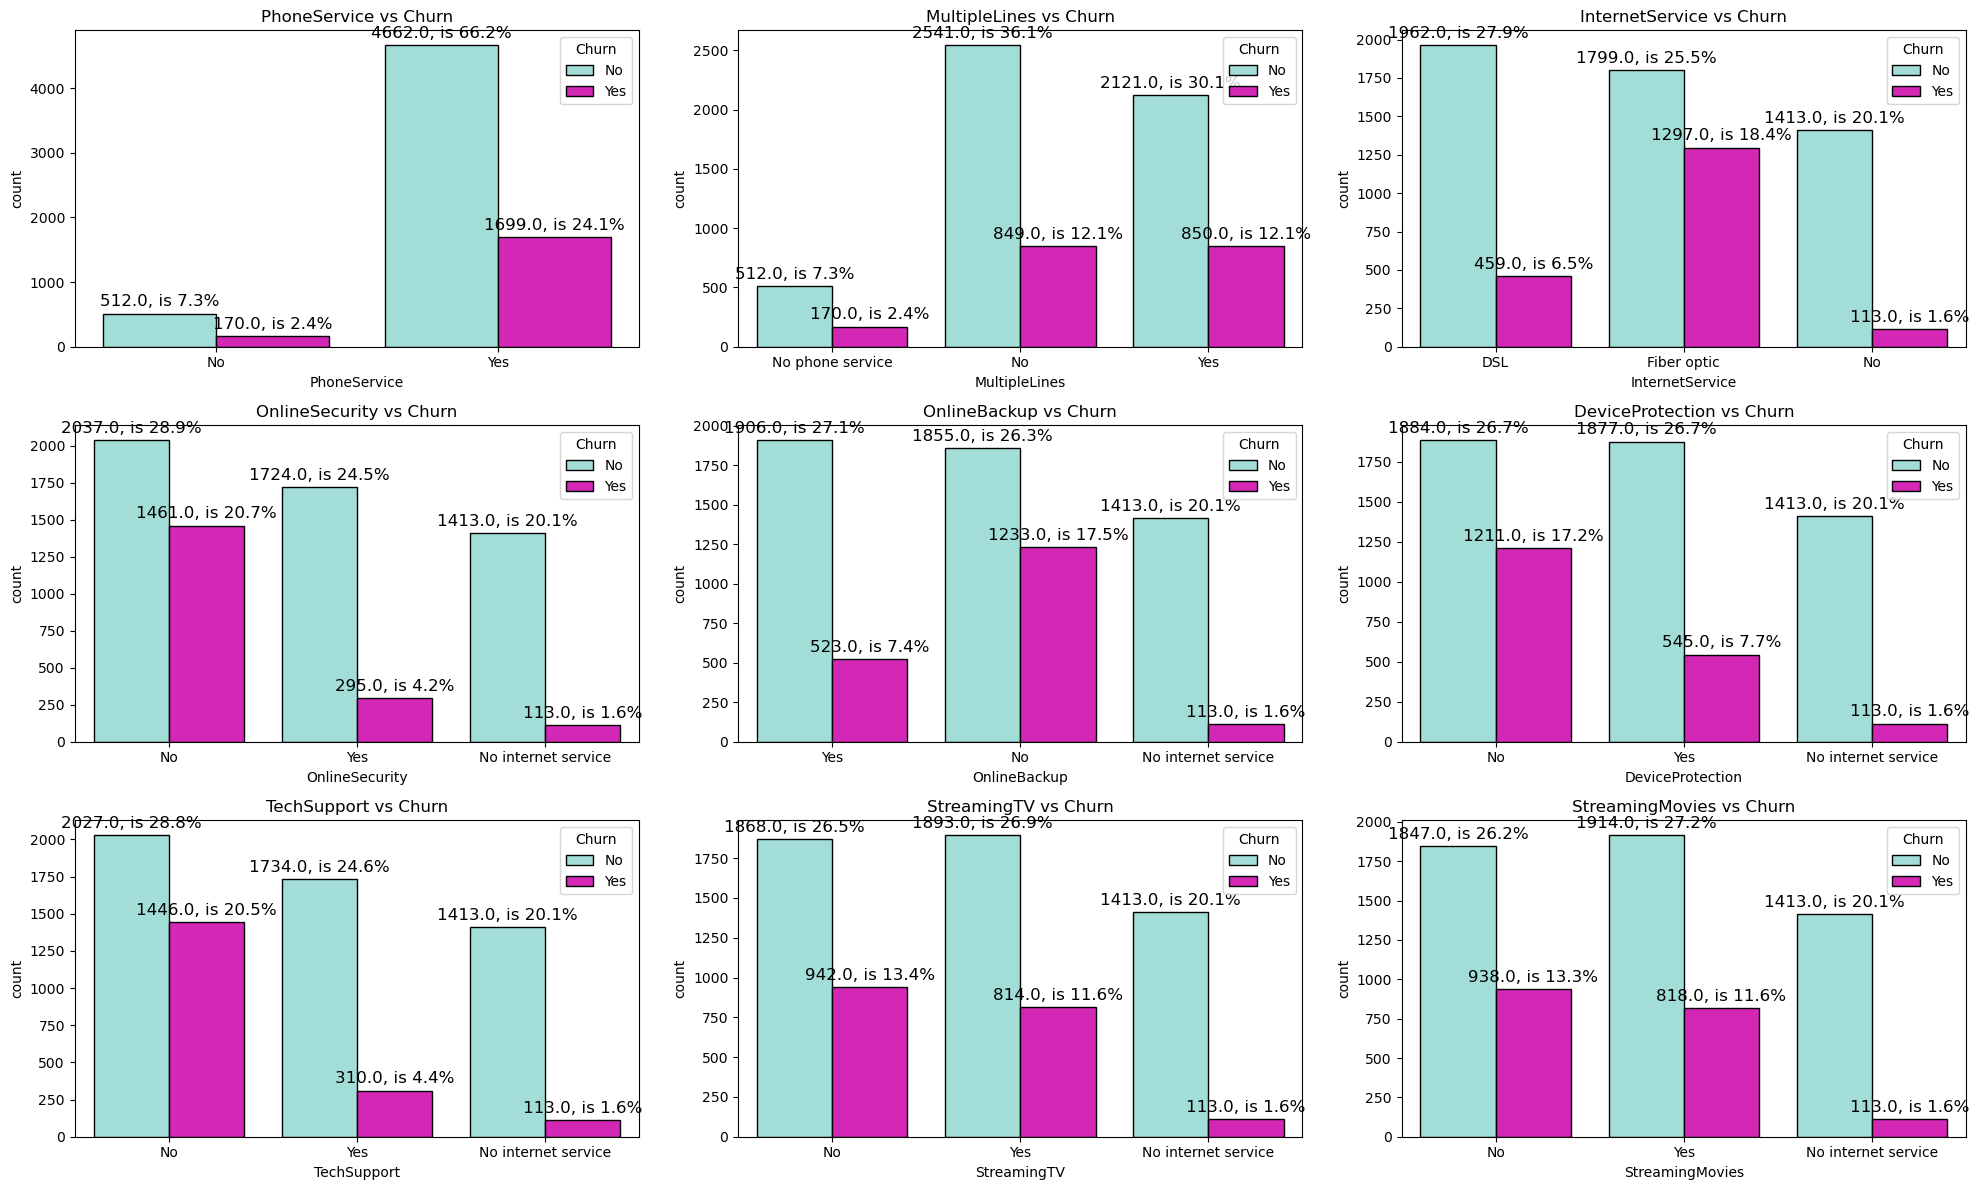

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,12))

colors = ['#9ae6de', '#f00ac9']
for ax, col in zip(axes.flat, g2):
    sns.countplot(x=col, hue='Churn', data=df, palette=colors, edgecolor='black', ax=ax)
    ax.set_title(f'{col} vs Churn')
    ax.set_xlabel(col)
    ax.legend(title='Churn', loc='upper right')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}, is {height/len(df)*100:.1f}%', 
                    xy=(p.get_x() + p.get_width()/2, height), 
                    xytext=(0, 3), 
                    textcoords='offset points', 
                    ha='center', va='bottom', 
                    fontsize=12)
plt.tight_layout()

>- The retention rate for customers without phone service is higher than the number of customers who have discontinued the service.
>
>- The presence or absence of MultipleLines does not seem to have an impact on the churn rate, as it remains the same.
>  
>- A significant number of customers have expressed their aversion to the use of Fiber optic cables for InternetService, while DSL remains the preferred choice among customers based on the above graph.
>
>- The graphs for StreamingTV and StreamingMovies are similar, and a large number of customers have churned regardless of their subscription to these services, suggesting that the content may not be solely responsible for the churn.
>
>- The visualizations highlight the importance of services such as OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport in retaining customers. A high number of customers have switched their service provider due to poor service quality with these features.

**Group 3**\
**Customer account information**

- What is the churn rate for customers with different types of contracts

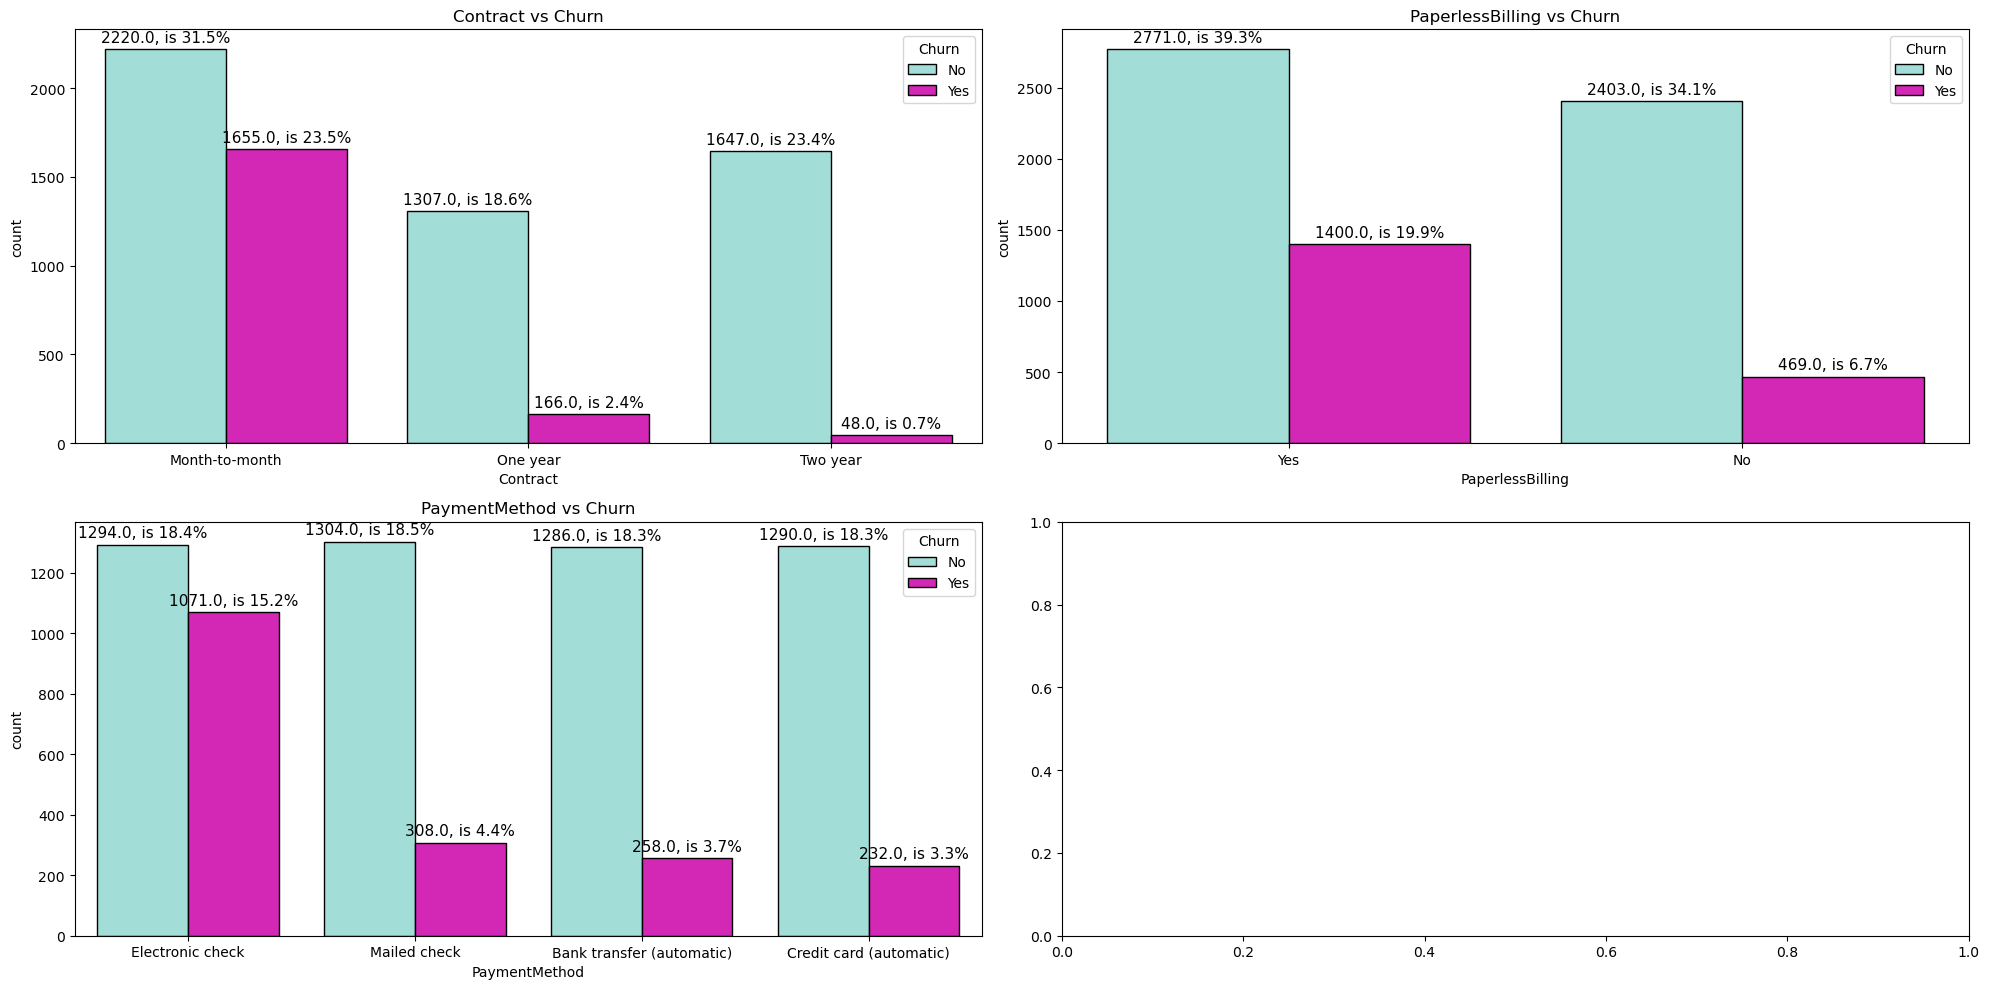

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))


colors = ['#9ae6de', '#f00ac9']
for ax, col in zip(axes.flat, g3):
    sns.countplot(x=col, hue='Churn', data=df, palette=colors, edgecolor='black', ax=ax)
    ax.set_title(f'{col} vs Churn')
    ax.set_xlabel(col)
    ax.legend(title='Churn', loc='upper right')
    
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}, is {height/len(df)*100:.1f}%', 
                    xy=(p.get_x() + p.get_width()/2, height), 
                    xytext=(0, 3), 
                    textcoords='offset points', 
                    ha='center', va='bottom', 
                    fontsize=11)
plt.tight_layout()


>- The rate of customer churn is significantly higher for those with a Month-to-Month based Contract. This could be attributed to the fact that these customers are testing out different services and opting for the 1 month plan to save money. 
>
>- In addition, inconsistencies in the quality of internet, streaming, and phone services may also be contributing to high churn rates, as each customer has different priorities and expectations.
>
>- A large number of customers who have opted for PaperlessBilling have also churned out. This may be due to issues with payments or receipts, which need to be addressed to improve customer retention.
>
>- The use of Electronic check PaymentMethod has received significant negative feedback from customers, with a staggering 1071 out of 2365 customers exiting the service due to issues with this payment method. The company needs to either discontinue the use of Electronic check or make significant improvements to make the payment process hassle-free and user-friendly.

## Label Encoding for Better Visualization

In [27]:
lab = LabelEncoder()
data = df.copy(deep = True)

cat_df_features = []
for i in list(df.columns):
    if i not in list(df.describe().columns):
        cat_df_features.append(i)
print("LabelEncoder Transformation")
for i in cat_df_features:
    data[i] = lab.fit_transform(data[i])
    print(i,' : ',data[i].unique(),' = ',lab.inverse_transform(data[i].unique()))

LabelEncoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [28]:
def plot_churn_by_columns(data, columns):
    # set the colors for the bars
    colors = ['#62f752', '#edf2ae', '#63ebcf', '#6f34ed']
    
    # create subplots with the appropriate number of rows and columns
    num_plots = len(columns)
    num_cols = 2
    num_rows = num_plots // 2 + num_plots % 2
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 6, num_rows * 5))

    # iterate over the columns and create a horizontal bar chart for each one
    for i, col in enumerate(columns):
        # count the number of churned customers for the column
        col_churn = data[data['Churn'] == 1][col].value_counts()
        # calculate the percentage of churned customers for the column
        col_churn_percent = round(col_churn / col_churn.sum() * 100, 1)
        # create a horizontal bar chart for the column
        plt.subplot(num_rows, num_cols, i+1)
        plt.barh(y=col_churn_percent.index, width=col_churn_percent.values, color=colors, edgecolor='black')
        # add labels to the bars
        for j, v in enumerate(col_churn_percent.values):
            plt.text(v + 1, j, f'{v}%', color='black', fontsize=12)
        # set the axis labels and title
        plt.xlabel('Percentage')
        plt.ylabel(col)
        plt.title(f'{col} Distribution of Churned Customers')
    
    # adjust the layout and spacing of the subplots
    plt.tight_layout()
    
    # display the plot
    plt.show()


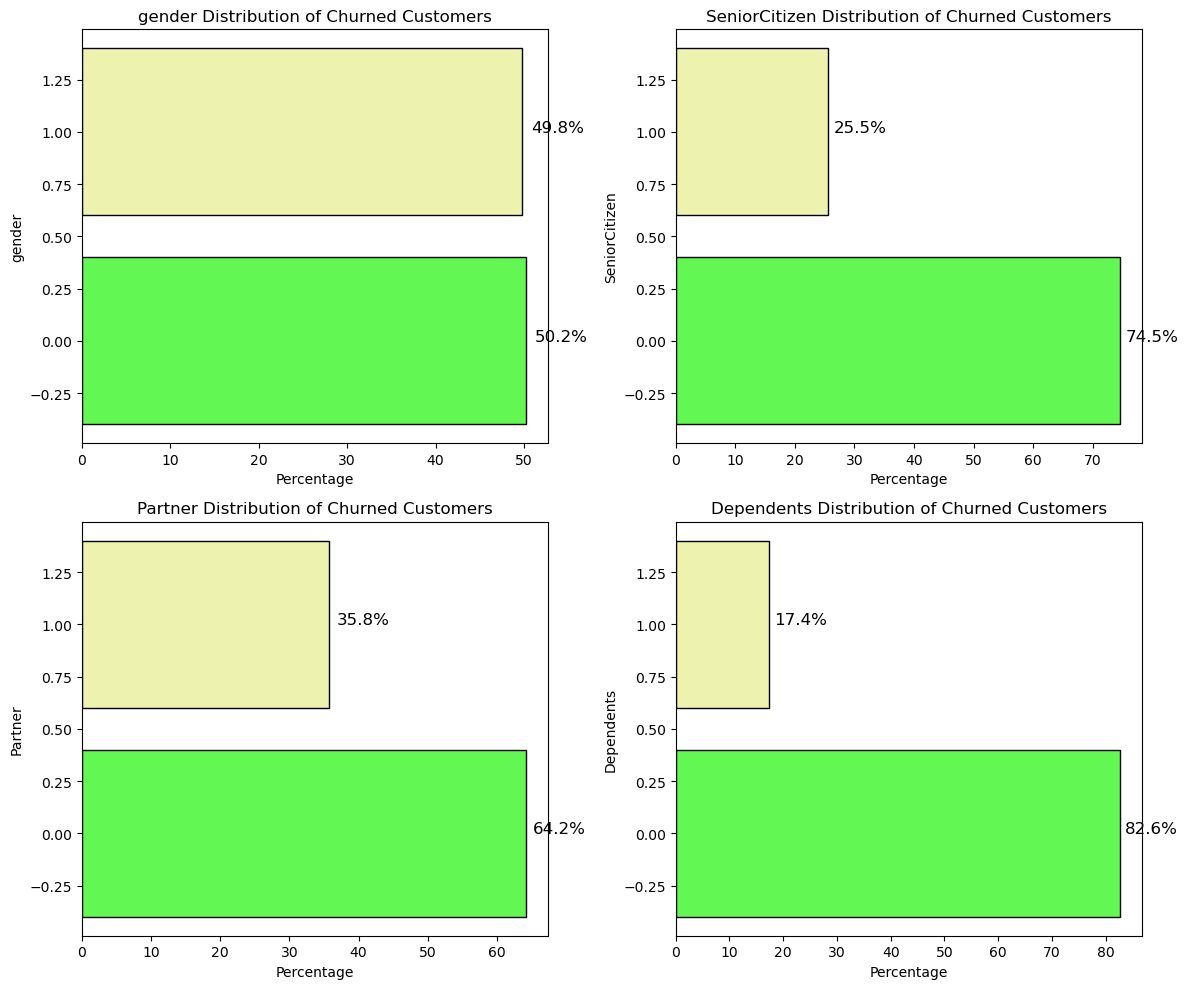

In [29]:
columns = g1
plot_churn_by_columns(data, columns)

>- It is evident that the reasons for customer churn are likely related to the services or processes provided, as there is an even 50-50 split between male and female customers who have switched services.
>
>- Of the customers who have churned, a significant majority - 75% - are not Senior Citizens. This information is crucial for the company to consider and address.
>
>- Customers who live alone have demonstrated a higher likelihood of cutting off services, with an average of 73.4% of churned customers being those who lived independently based on data from Partners and Dependents.

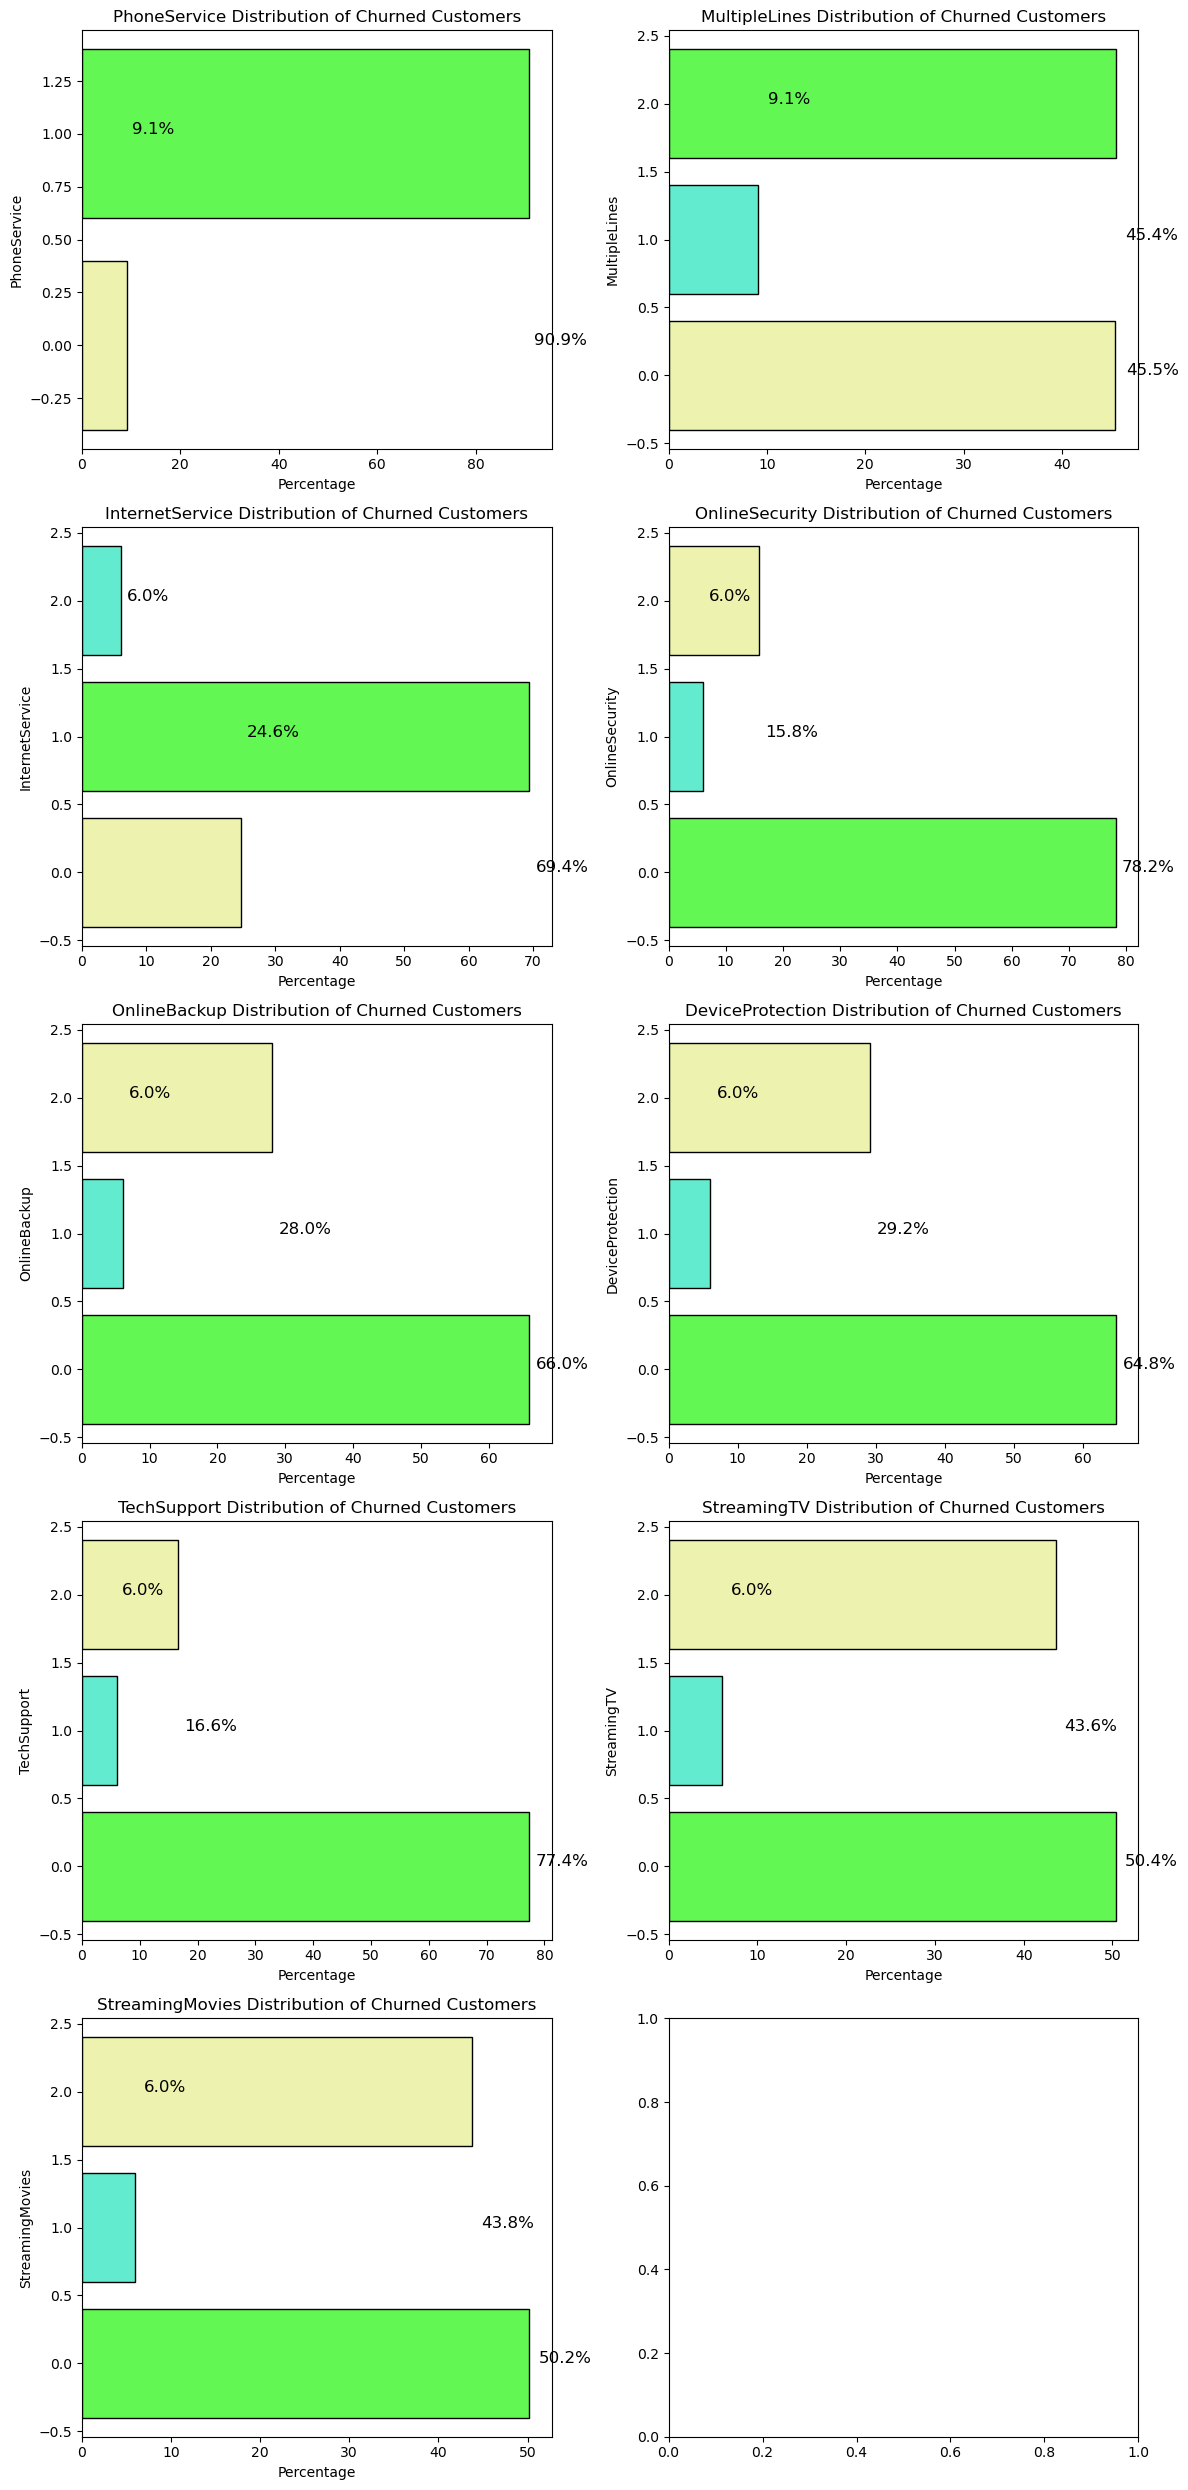

In [30]:
columns = g2
plot_churn_by_columns(data, columns)

>- Despite offering PhoneService, a large percentage of customers have still chosen to switch providers. Similarly, the availability of MultipleLines did not appear to make a difference, as customers cancelled their subscriptions regardless of this feature.
>
>- The use of Fiber Optic cables to provide InternetService was not well received by customers, with a significant 70% opting out of the service.
>
>- For StreamingTV and StreamingMovies, customers who did not have these services were more likely to cancel their subscription. However, an average of 43.7% of customers who did consume this streaming content still chose to switch providers.
>
>- The bar charts highlight the importance of offering OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport, as a significant average of 71.6% of customers cancelled their services due to the lack of these features.

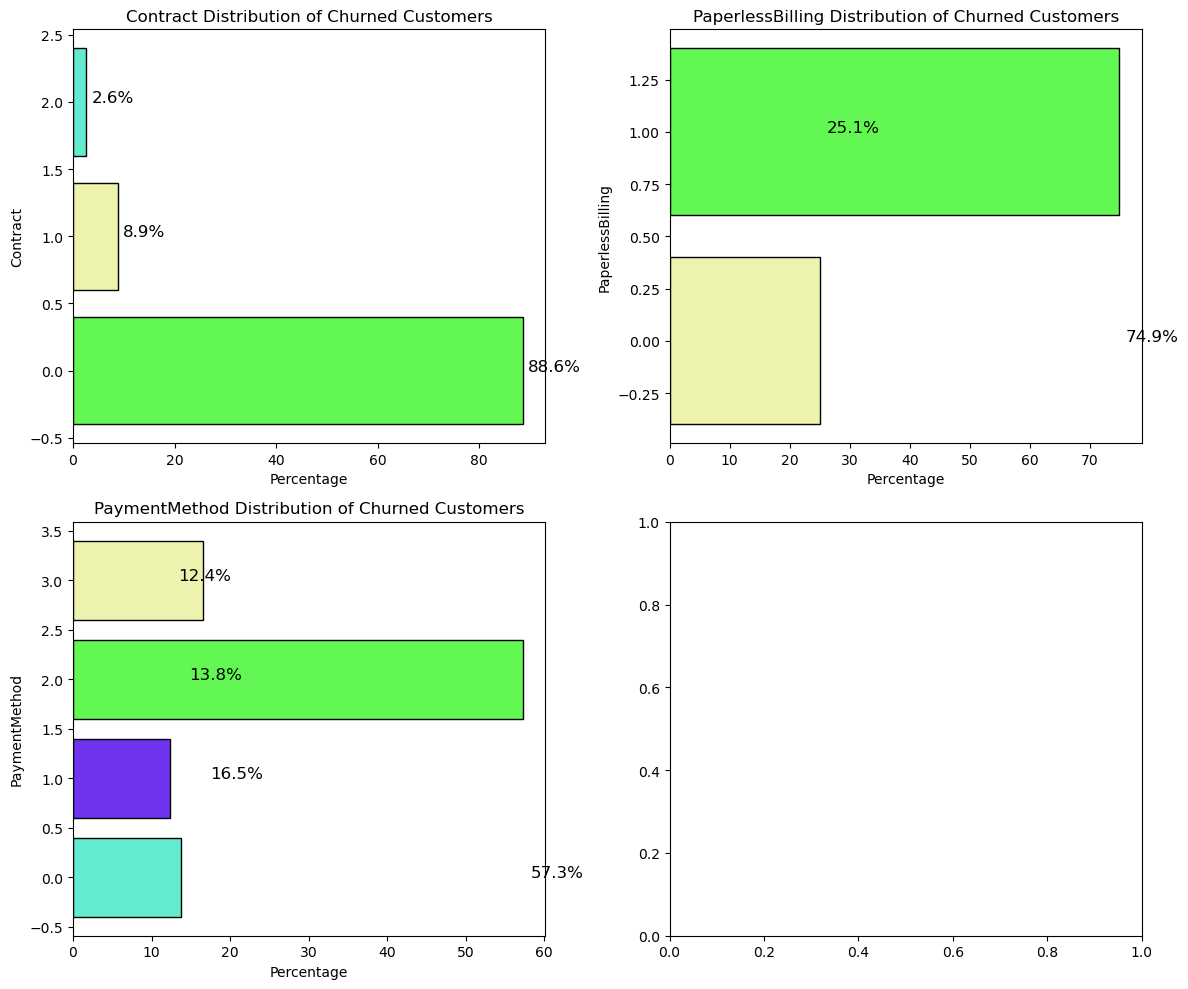

In [31]:
columns = g3
plot_churn_by_columns(data, columns)


>- Month-to-month contracts have the highest churn rate among customers, with a significant 88.6% of them churning.
>
>- Customers do not appear to value paperless billing, as it is associated with a relatively high churn rate.
>
>- Electronic check is a payment method that needs attention, as it accounts for 57.3% of churn. The next highest churn rates are associated with mailed check, bank transfer (automatic), and credit card (automatic) payment methods.

# Numerical Features

## Distribution of Numerical Features

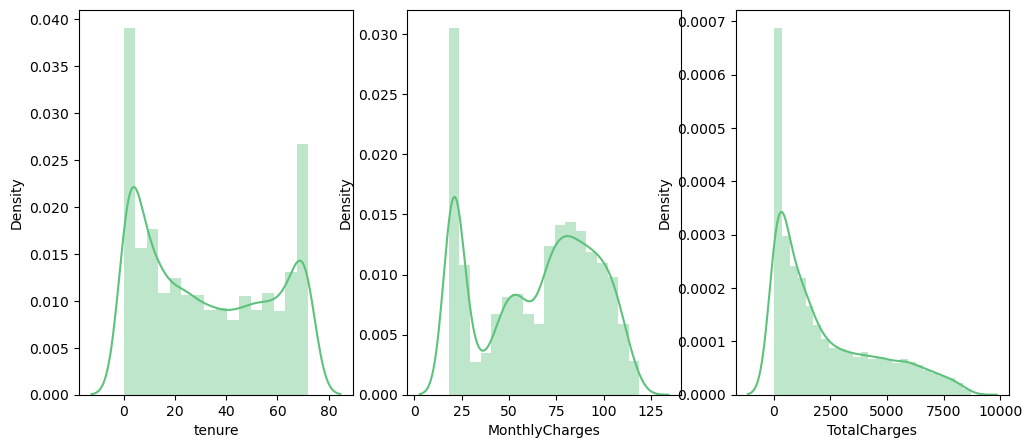

In [32]:
plt.figure(figsize=(12,5))
for i in range(len(numerical_feat)):
    plt.subplot(1,3,i+1)
    sns.distplot(data[numerical_feat[i]], color = '#5dc27b')

## Numerical Features w.r.t Target Variable (Outcome) :

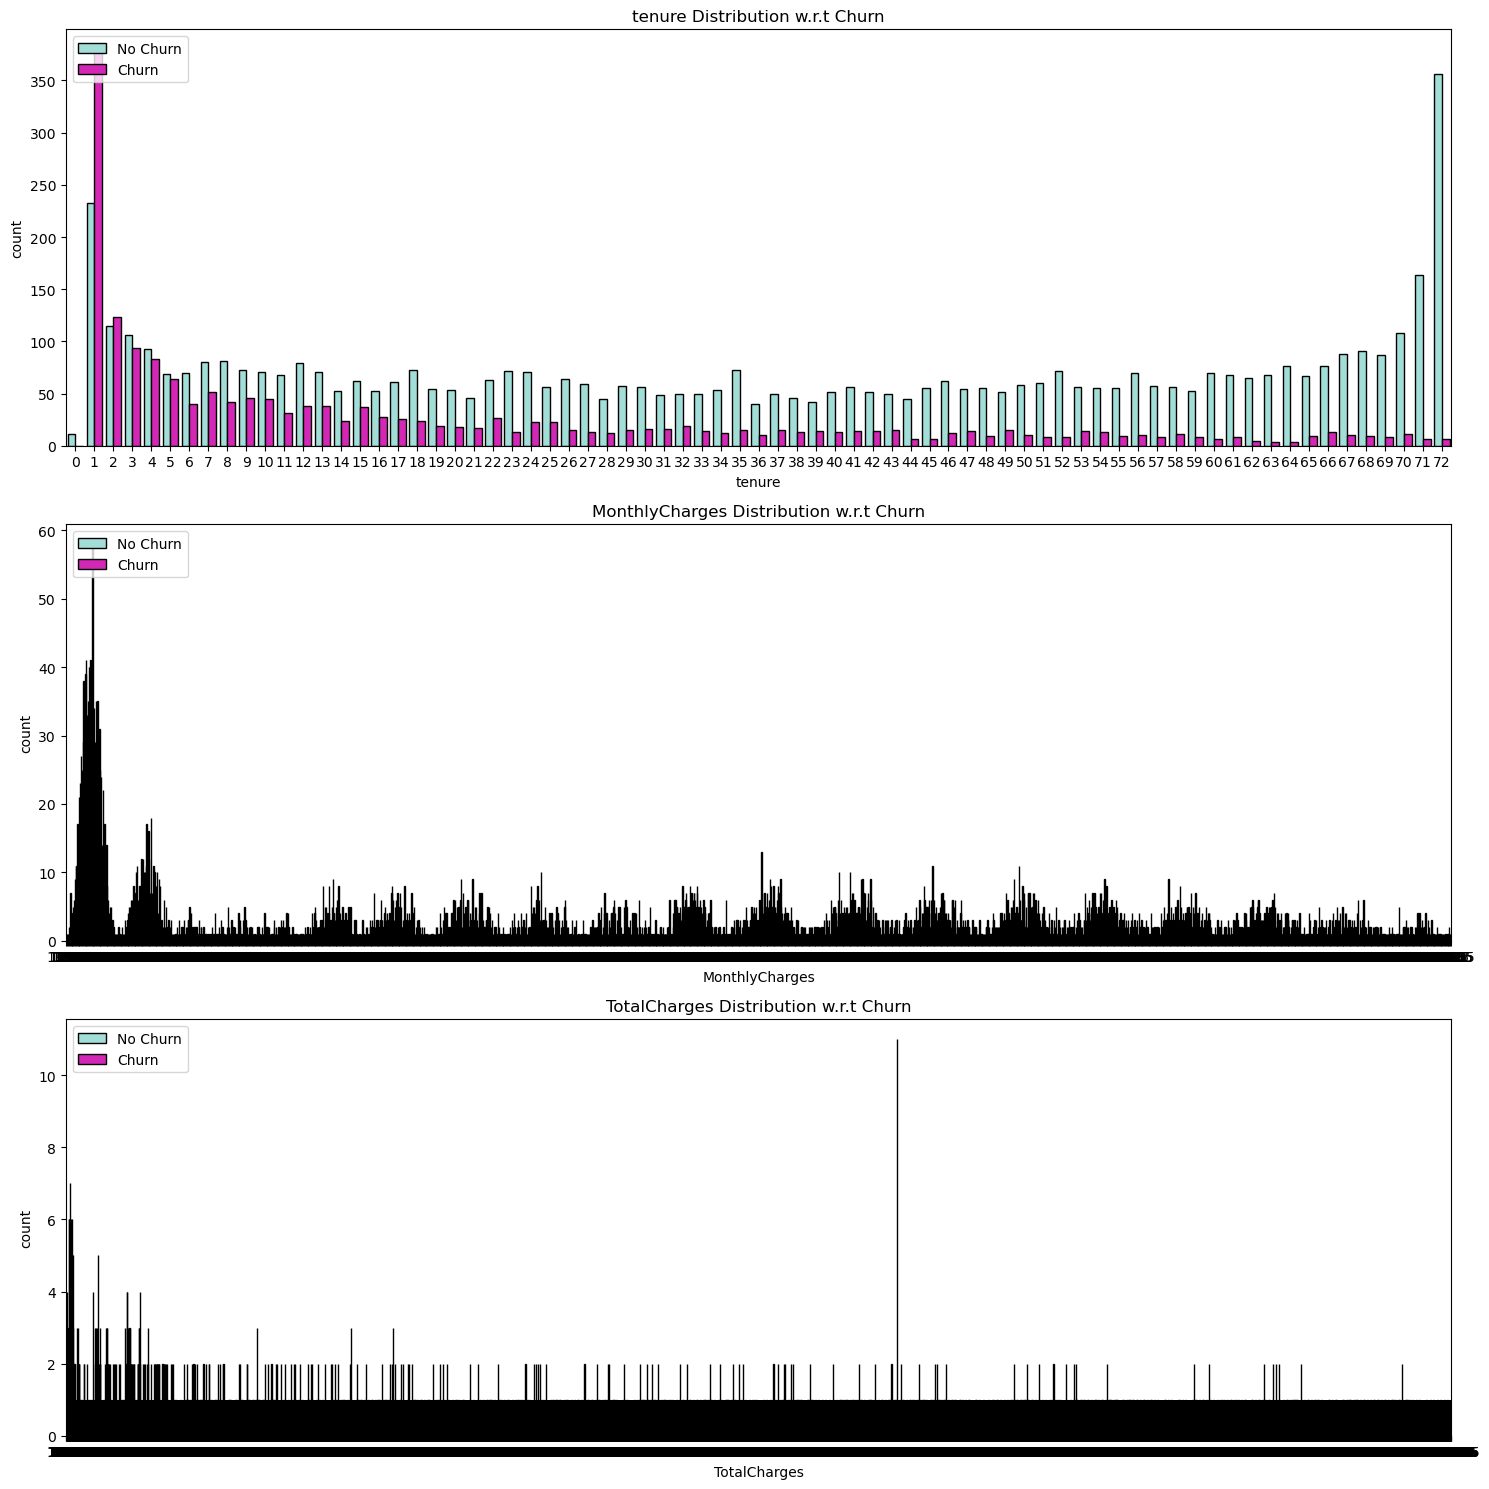

In [33]:
# create subplots with the appropriate number of rows and columns
num_plots = len(numerical_feat)

fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(15,15))
colors = ['#9ae6de', '#f00ac9']

# iterate over the numerical features and create a count plot for each one
for i, feature in enumerate(numerical_feat):
    plt.subplot(num_plots, 1, i+1)
    sns.countplot(x=feature, hue='Churn', data=data, palette=colors, edgecolor='black')
    plt.legend(['No Churn', 'Churn'], loc='upper left')
    plt.title(f'{feature} Distribution w.r.t Churn')

# adjust the layout and spacing of the subplots
plt.tight_layout()

# display the plot
plt.show()


>- A large number of customers tend to cancel their services within the first month of subscription, and this trend continues for 4-5 months before gradually declining. As customers' tenure with the company increases, the rate of churn decreases, resulting in a symmetrical graph with high churn numbers on the left and low churn numbers on the right.
>
>- However, gaining insights from the MonthlyCharges and TotalCharges features can be challenging due to their numerous unique data points. To make these features more understandable and aid visualization, we will scale them by dividing each data point by 5 or 500, depending on the range of values, and assign the quotient value as a representative constant. The scaling constants are determined by analyzing the data and intuition.

## Numerical features Vs Categorical Features With respect to Target Varaibel:

### Tenure

In [34]:

def plot_box_by_columns(data, columns):
    colors = ['#9ae6de', '#f00ac9']
    
    # create subplots with the appropriate number of rows and columns
    num_plots = len(columns)
    num_cols = 2
    num_rows = (num_plots + 1) // num_cols
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 6, num_rows * 6));
    
    for i, col in enumerate(columns):
        plt.subplot(num_rows, num_cols, i+1);
        sns.boxplot(x = col, y = 'tenure', data = df, hue = "Churn", palette=colors);
        plt.title(f'{col} vs Tenure w.r.t. Churn');
        plt.xlabel(col);
        plt.ylabel('Tenure');
        plt.legend( loc='upper right');

plt.tight_layout();
plt.show();

<Figure size 640x480 with 0 Axes>

#### Tenure Vs G1

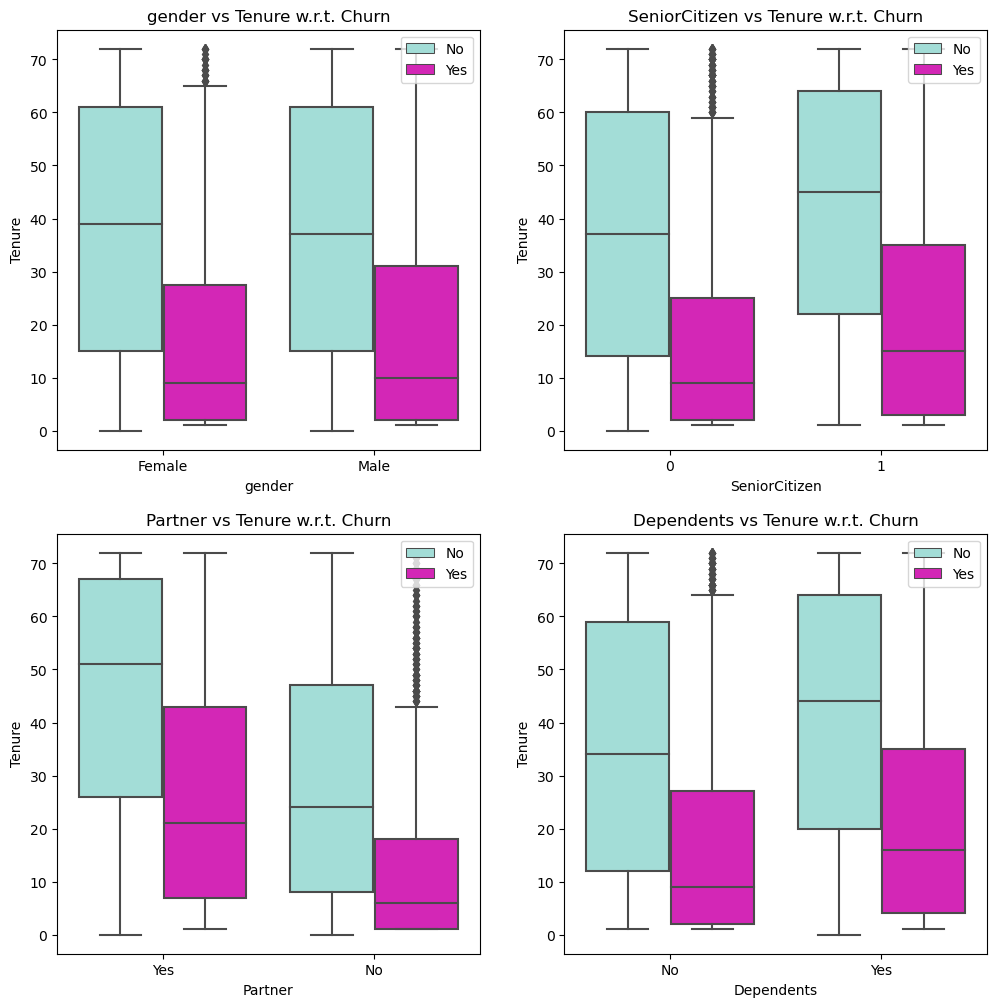

In [35]:
columns = g1
plot_box_by_columns(data, columns)

>- The graphs for male and female customer churn demonstrate a high degree of similarity.
>
>- SeniorCitizen customers tended to opt out of services within the first 35 months of tenure, with a significant proportion making their decision between 20-35 months into their tenure.
>
>- Customers who lived with a partner tended to remain with the service for a period of 5-45 months.

#### Tenure Vs G2

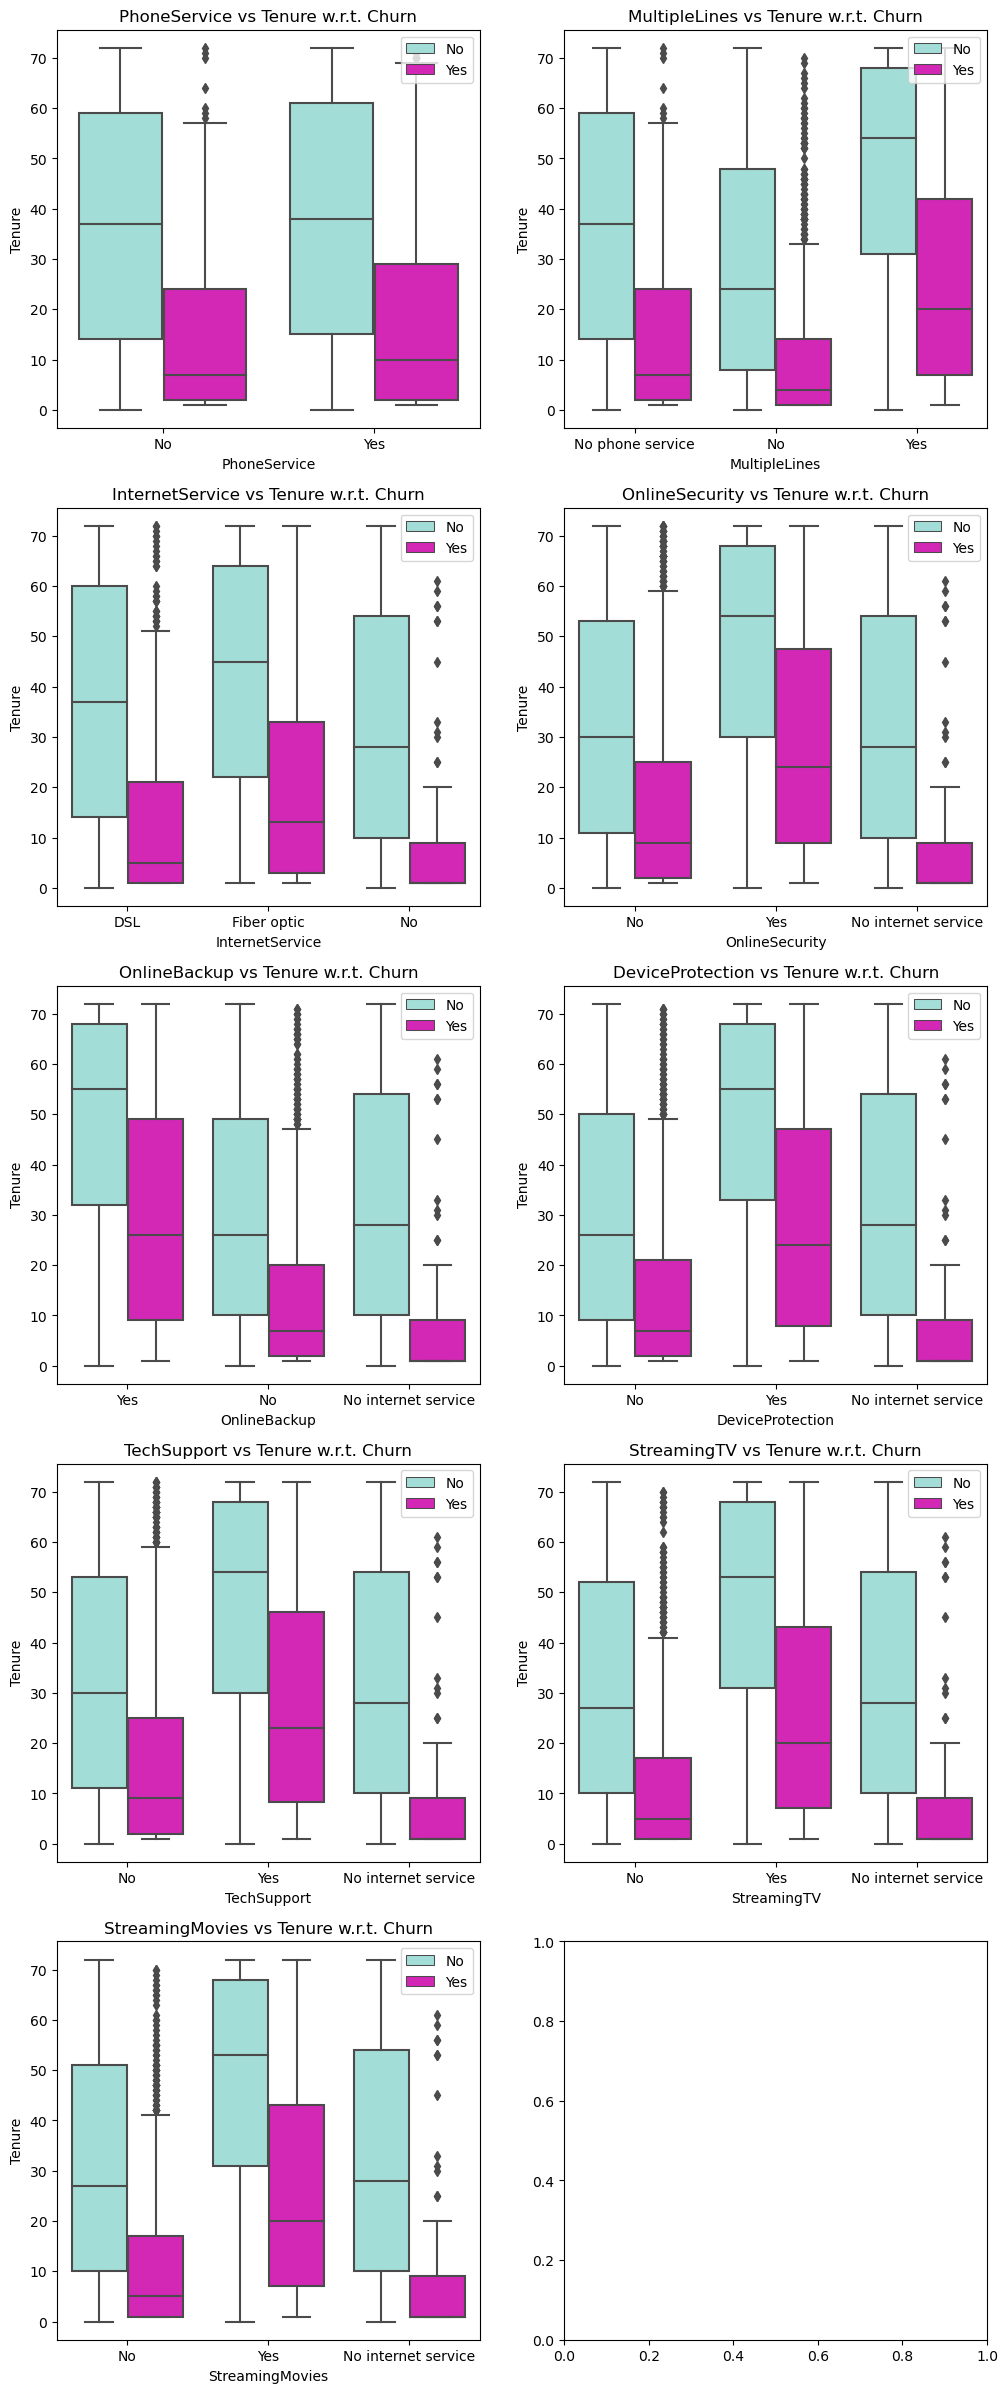

In [36]:
columns = g2
plot_box_by_columns(data, columns)

>- The presence of multiple phone lines appears to increase the median monthly charges, regardless of whether customers opt out of the service or not.
>
>- When examining the graph of tenure versus phone service, it is apparent that there is a mirror image between the availability of phone service and the number of months a customer remains with the service. This suggests that customers may not heavily utilize phone services such as calls or messages.
>
>- Concerning internet service, customers seem hesitant to use optic fibre cables, as the churn period for these services lasts between 30 to 35 months before customers either continue with the service or switch to a new provider.
>
>- For streaming TV and streaming movies, a churn period of about 10 to 40 months is evident.
>
>- Regarding online security, online backup, device protection, and tech support, the median churn tenure is 25 months, with the highest value being around 45 months. Customers typically take around 30 to 35 months to decide whether to continue with their current service or switch providers based on the aforementioned features.

#### Tenure Vs G3

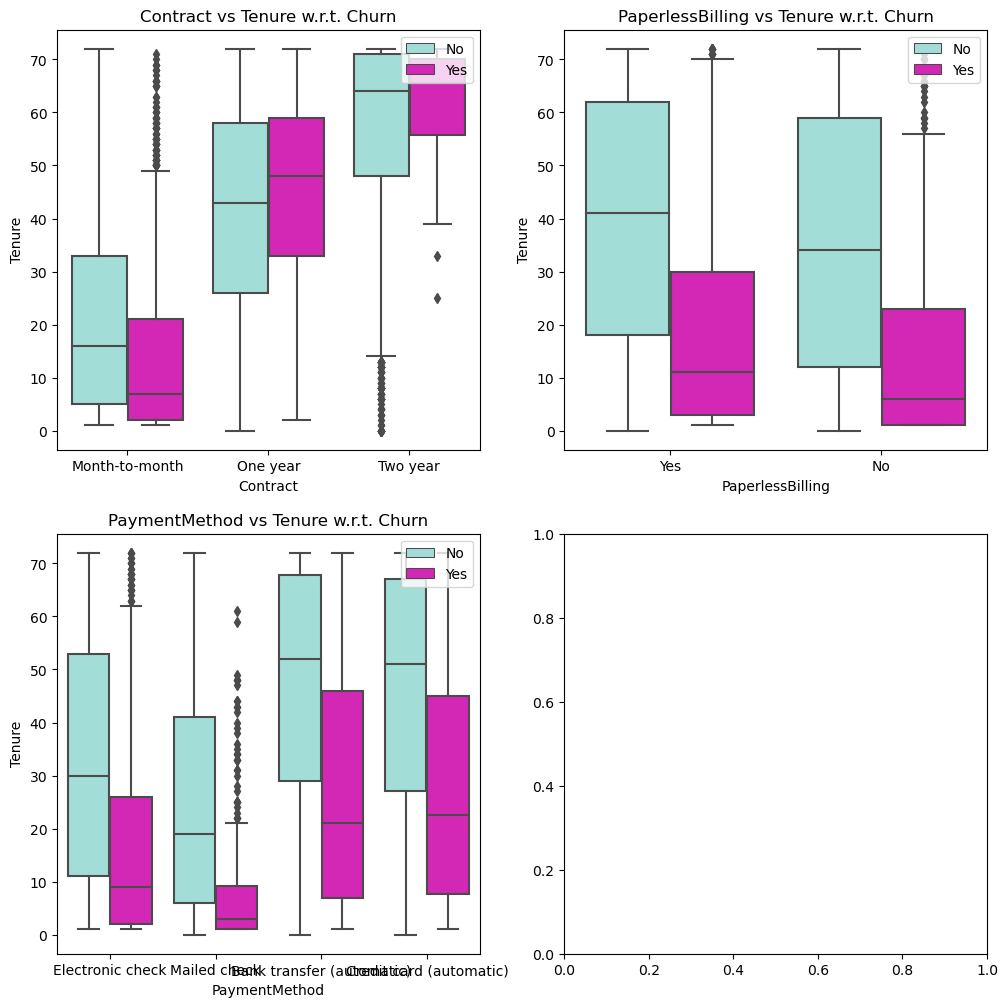

In [37]:
columns = g3
plot_box_by_columns(data, columns)

>- Customers who opt for One-year and Two-year contracts tend to continue with the services for around 25 months and 45 months, respectively. However, they begin to question the services at the 35-month and 55-month marks, respectively, and consider switching to another service provider.
>
>- Regardless of whether customers choose PaperlessBilling, they are inclined to consider switching from the very first month of service.
>
>- When it comes to PaymentMethod, customers who use Bank Transfer (automatic) and Credit Card (automatic) have a median churn tenure of over 20 months, which is almost double that of customers who use Electronic check (around 10 months) or Mailed check (around 5 months).


### MonthlyCharges vs Categorical Features :

In [38]:
def plot_box_by_monthchar(data, columns):
    colors = ['#9ae6de', '#f00ac9']
    
    # calculate the number of rows and columns based on the length of the columns list
    num_plots = len(columns)
    num_cols = 2
    num_rows = (num_plots + 1) // num_cols
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 6, num_rows * 6));
    
    for i, col in enumerate(columns):
        row_num = i // num_cols
        col_num = i % num_cols
        plt.subplot(num_rows, num_cols, i+1)
        sns.boxplot(x=col, y='MonthlyCharges', data=df, hue="Churn", palette=colors)
        plt.title(f'{col} vs MonthlyCharges')
        plt.xlabel(col)
        plt.ylabel('MonthlyCharges')
        plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


#### MonthlyCharges Vs G1

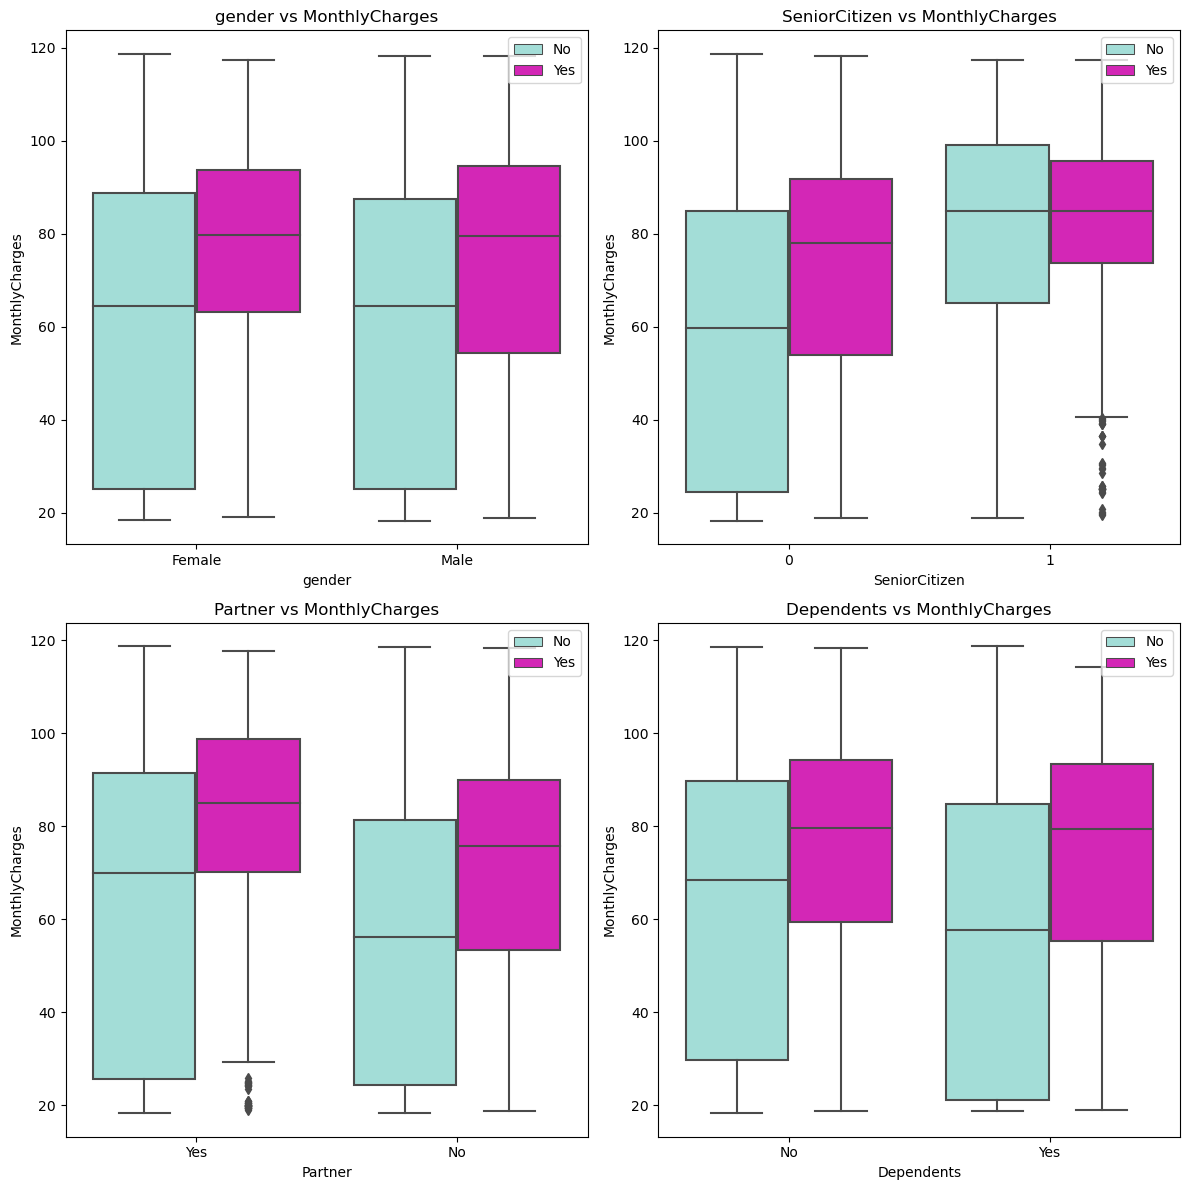

In [39]:
columns = g1
plot_box_by_monthchar(data, columns)

>- The median values of the non-churned customers are closely aligned with the lower limits of the churned customers for all the features mentioned.
>
>- Both male and female customers exhibit a median MonthlyCharges value of approximately 60. However, for SeniorCitizen customers, this value is higher at around 80.
>
>- Customers who live with a partner have a higher lower limit for churning at a MonthlyCharges value of 70, compared to those who live alone with a MonthlyCharges value just below 60.

#### MonthlyCharges Vs G2

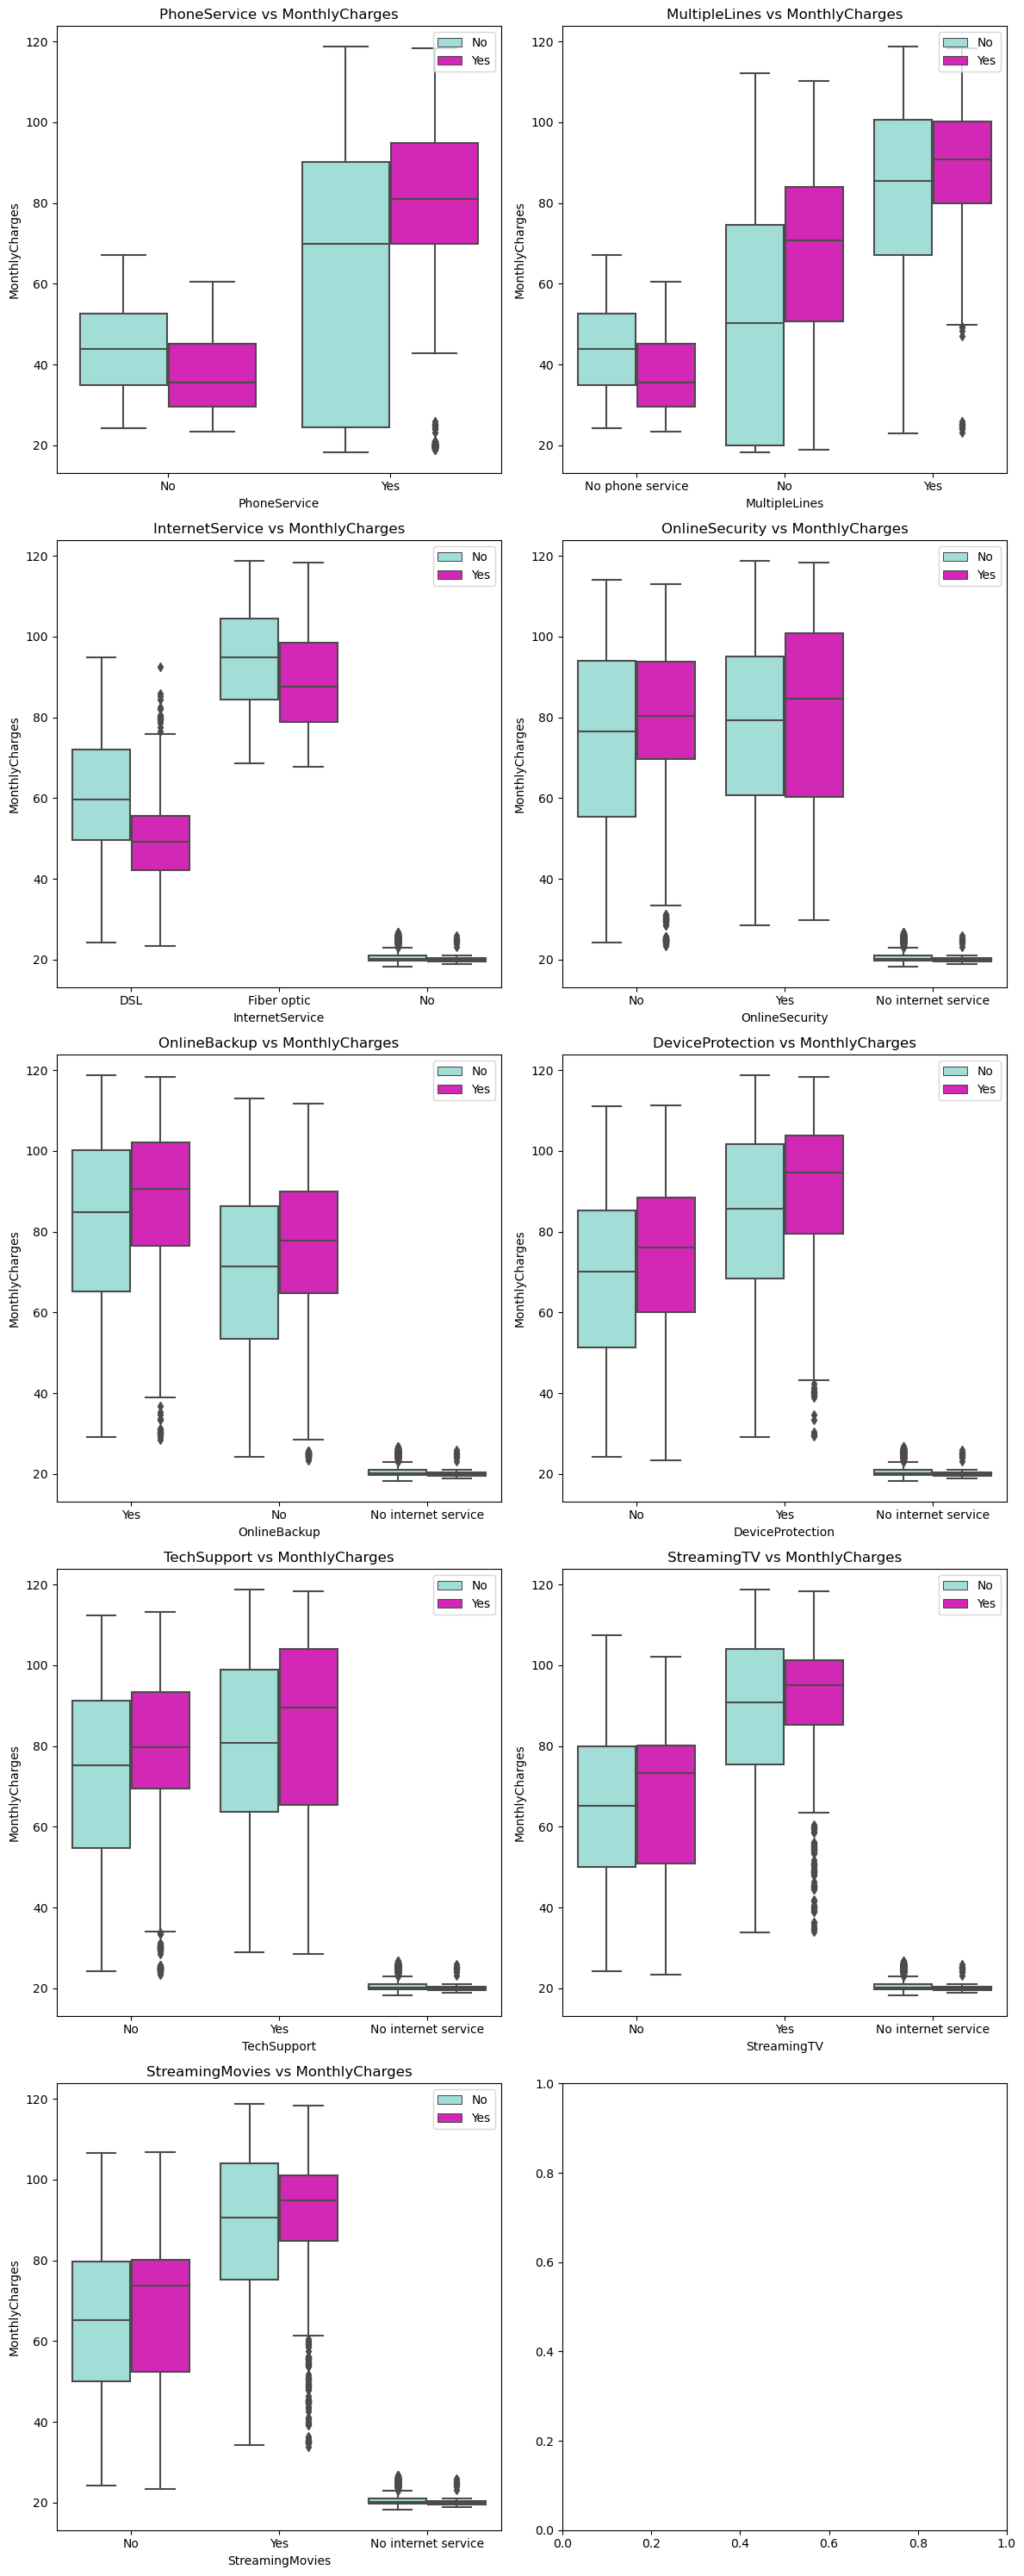

In [40]:
columns = g2
plot_box_by_monthchar(data, columns)

>- The high MonthlyCharges associated with Fiber Optic cables may be contributing to the high churn rate of customers. Similarly, customers may be deterred by the high MonthlyCharges associated with StreamingTV and StreamingMovies.
>
>- While the MonthlyCharges for PhoneService fall within a range of 25 to 85, customers tend to consider cancelling their subscription when the MonthlyCharges reach 75.
>
>- For services such as OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport, the range of MonthlyCharges varies from approximately 50 to 100. However, it appears that customers who subscribe to these services do not base their decision to cancel their subscription solely on MonthlyCharges, as the range of values for both continuing and unsubscribing customers is nearly the same.

#### MonthlyCharges Vs G3

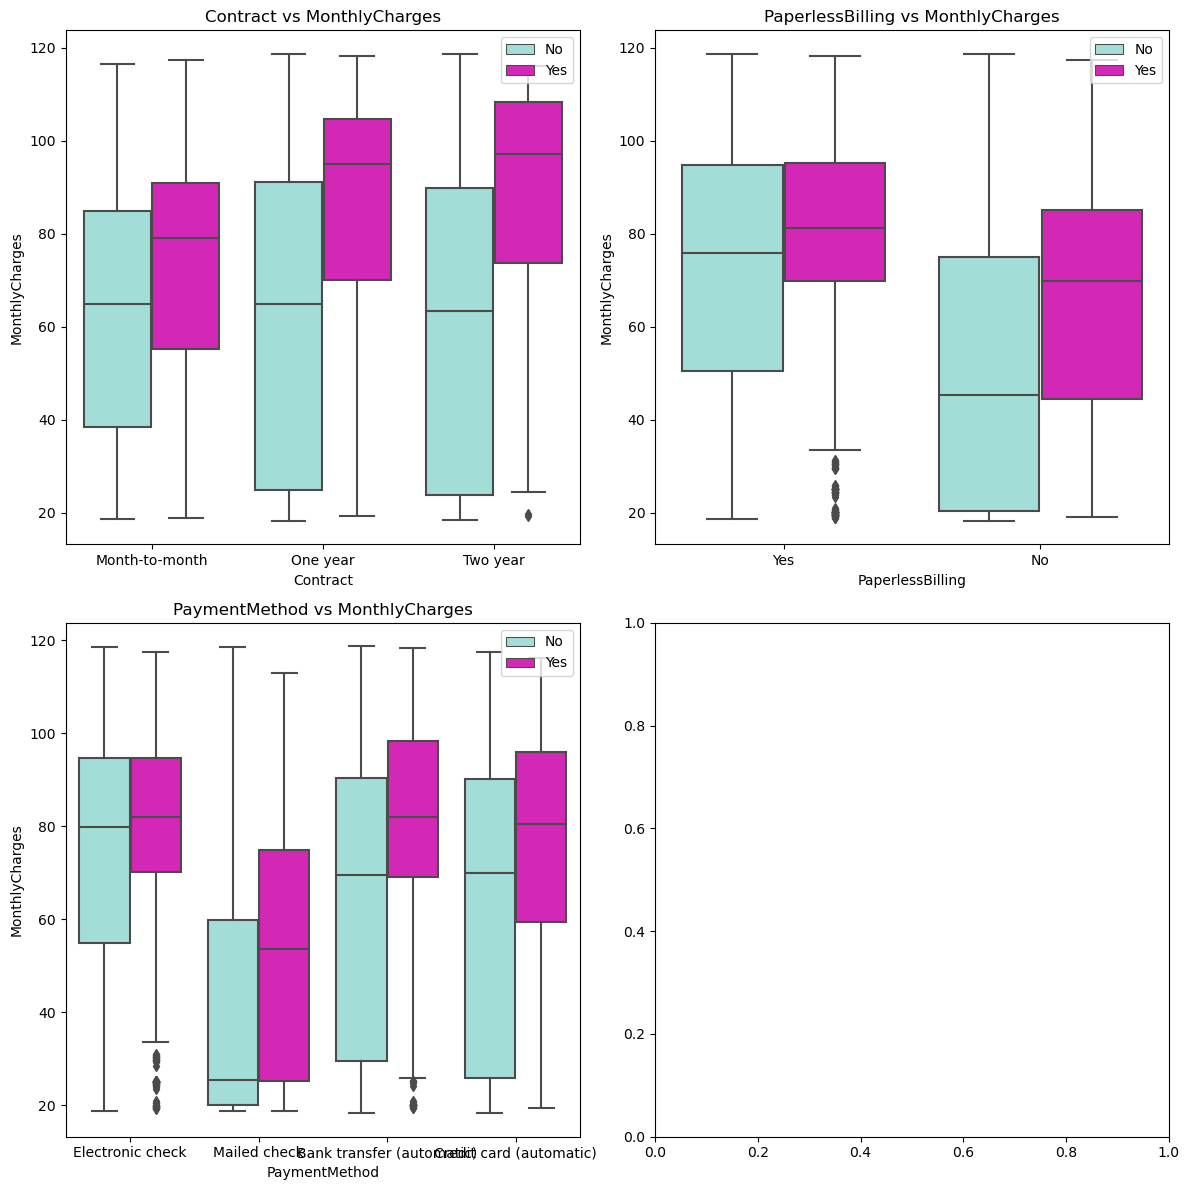

In [41]:
columns = g3
plot_box_by_monthchar(data, columns)

>- For Month-to-Month contracts, the minimum MonthlyCharges threshold is higher compared to One year and Two year contracts. However, the lower limit of MonthlyCharges for customers who discontinue the services is lower for Month-to-Month contracts.
>
>- The minimum threshold for Electronic check payments is very high, which could be a significant factor contributing to customer reluctance in using it. On the other hand, Mailed check payments have the lowest starting values for both churned and retained customers.

### TotalCharges vs Categorical Features :

In [42]:
def plot_box_by_Totalchar(data, columns):
    colors = ['#9ae6de', '#f00ac9']
    
    # calculate the number of rows and columns based on the length of the columns list
    num_plots = len(columns)
    num_cols = 2
    num_rows = (num_plots + 1) // num_cols
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 6, num_rows * 6));
    
    for i, col in enumerate(columns):
        row_num = i // num_cols
        col_num = i % num_cols
        plt.subplot(num_rows, num_cols, i+1)
        sns.boxplot(x=col, y='TotalCharges', data=df, hue="Churn", palette=colors)
        plt.title(f'{col} vs TotalCharges')
        plt.xlabel(col)
        plt.ylabel('TotalCharges')
        plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


#### TotalCharges vs G1

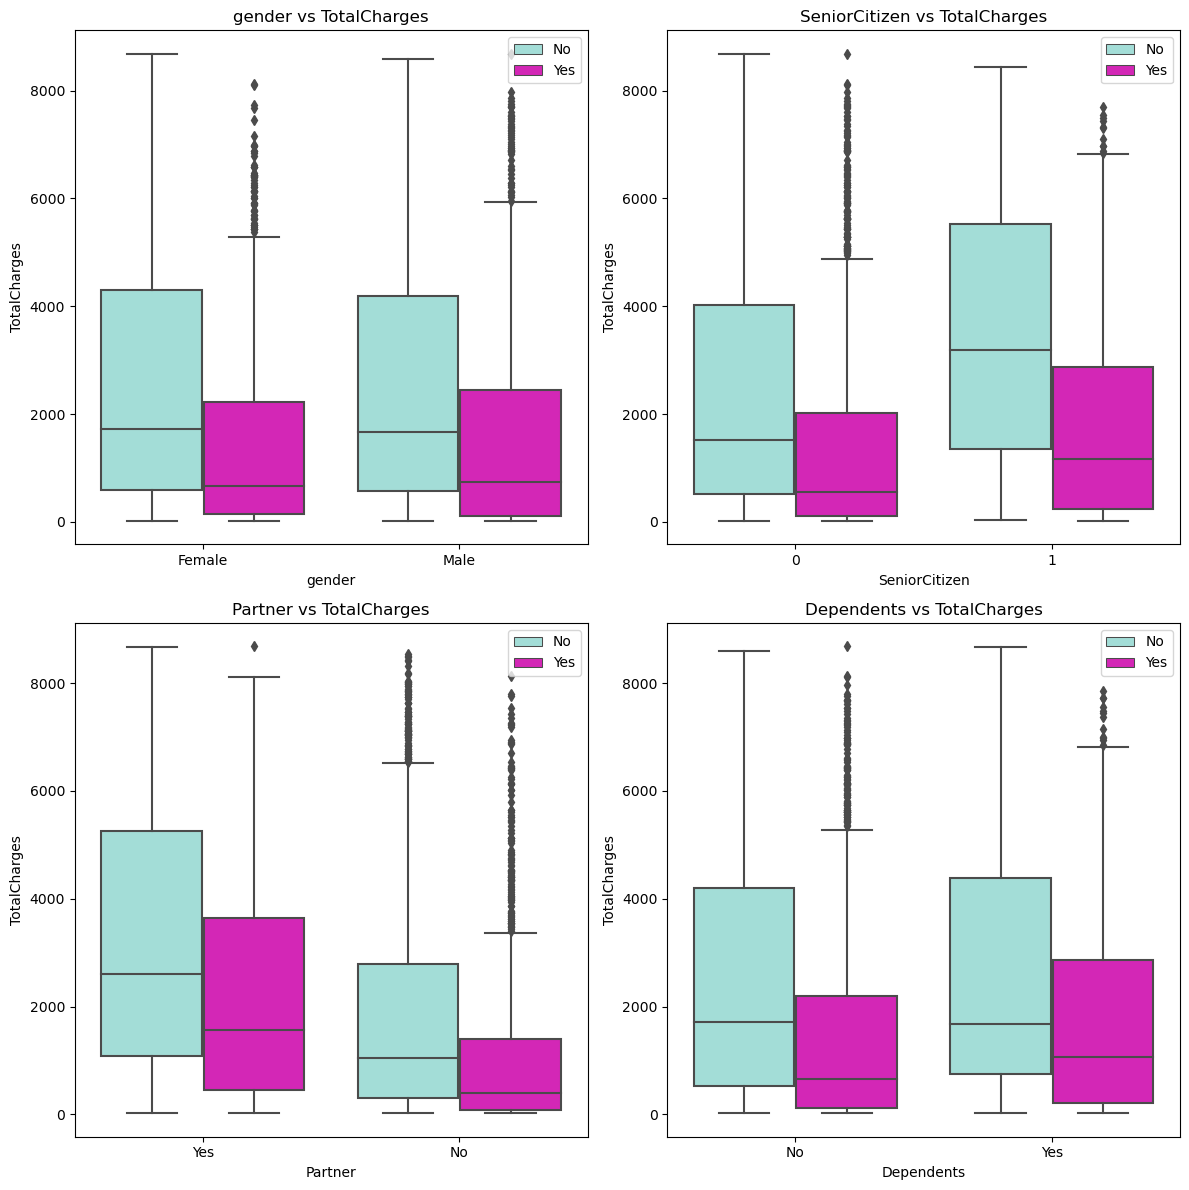

In [43]:
columns = g1
plot_box_by_Totalchar(data, columns)

>- There is not a significant difference in TotalCharges between male and female customers. However, among the SeniorCitizen customers who did not churn, there are higher starting and closing values of TotalCharges.
>
>- Customers who live with their partner tend to have a higher median value of TotalCharges compared to those who live alone.

#### TotalCharges vs G2

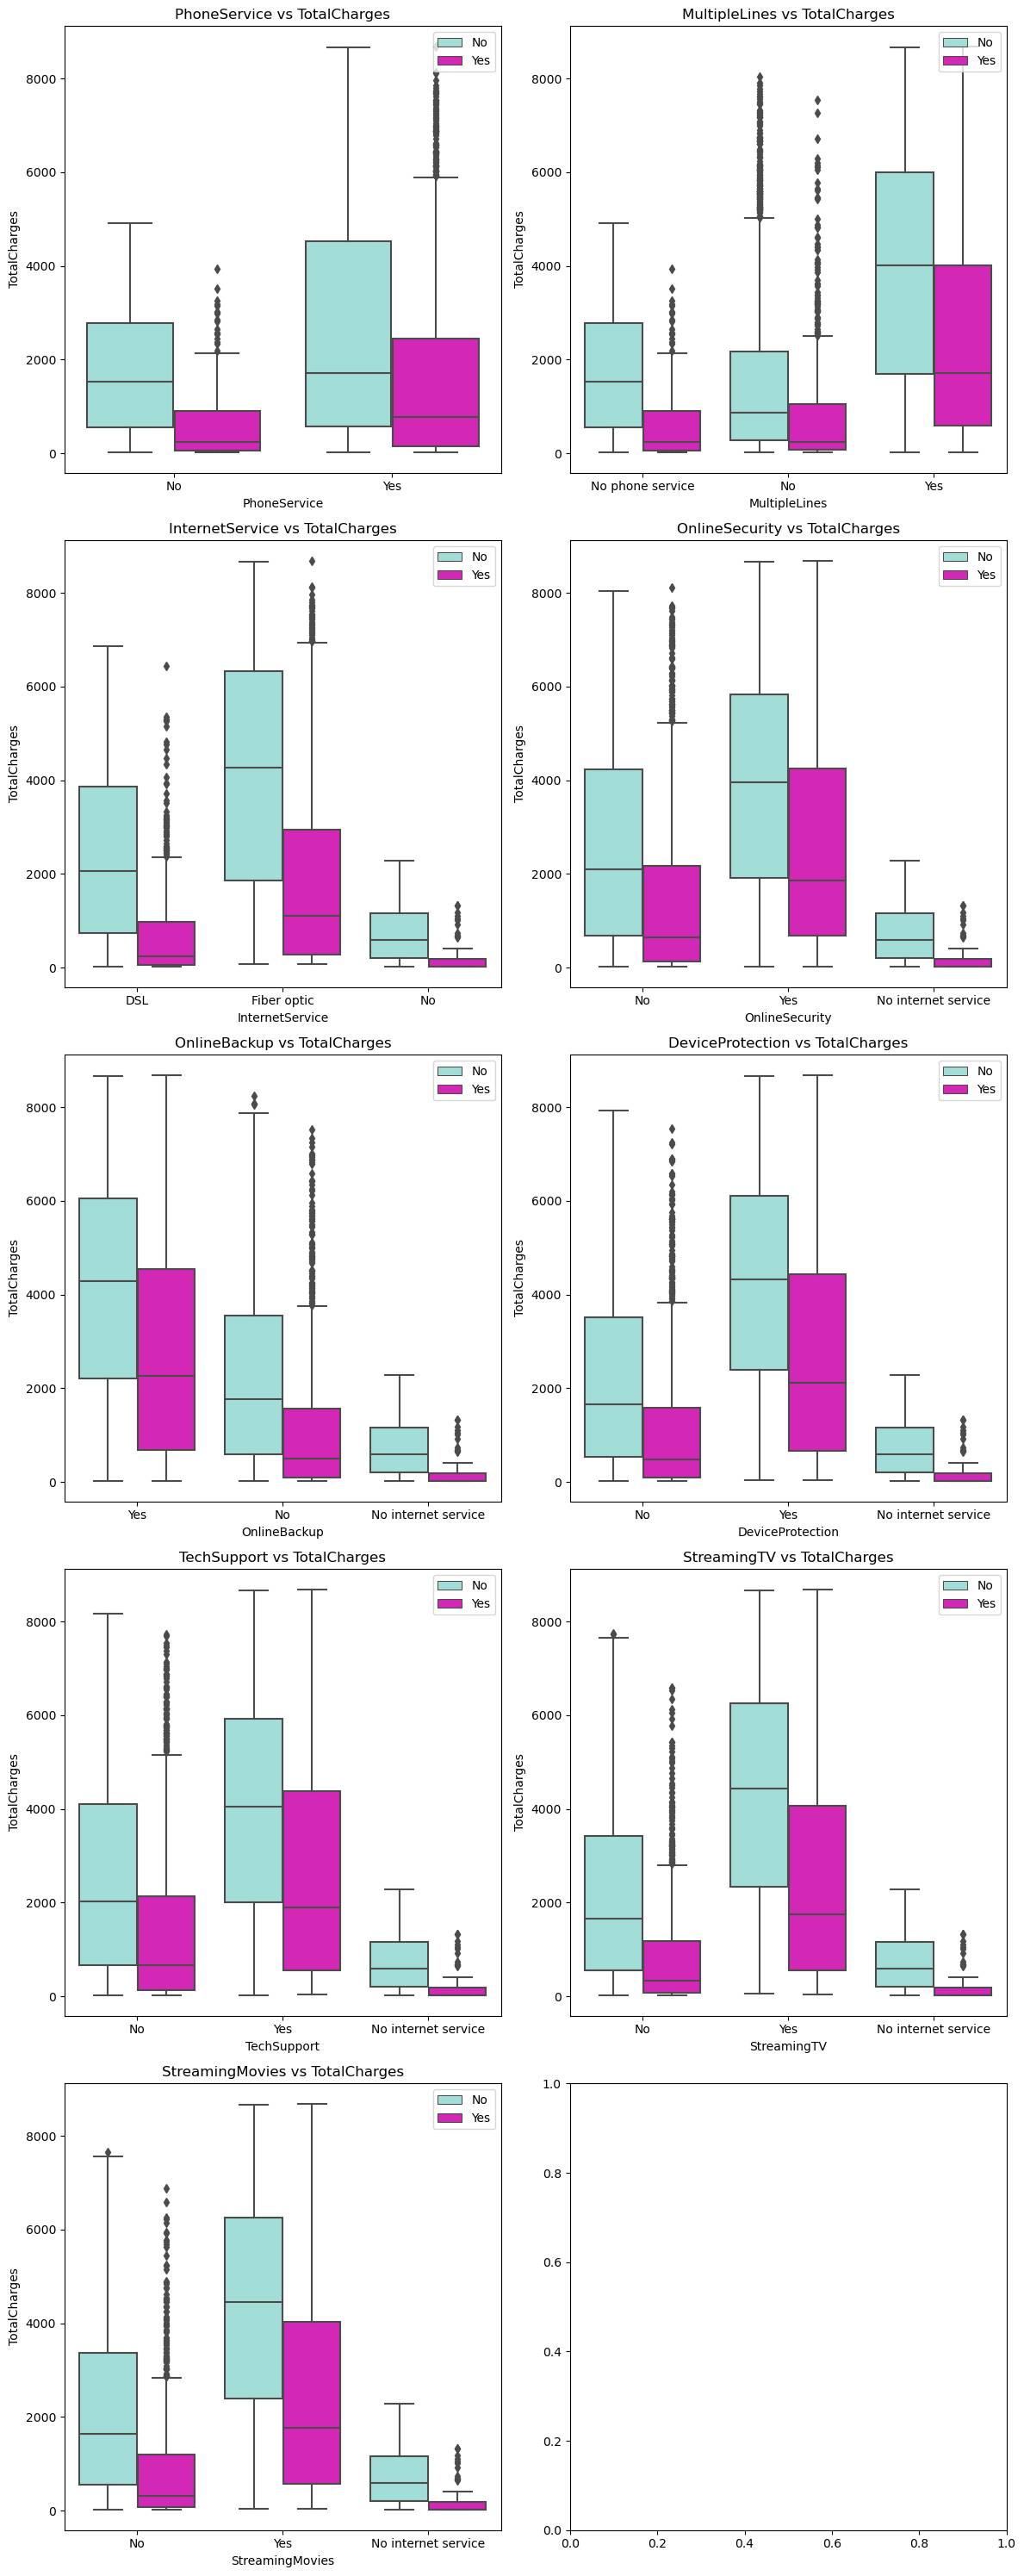

In [44]:
columns = g2
plot_box_by_Totalchar(data, columns)

>- The TotalCharges for PhoneService range from 0 to 4000, but customers tend to have second thoughts about the service once their charges approach the 1000 mark. Similarly, customers start to hesitate about paying around 2000 for MultipleLines. However, some customers are willing to pay as much as 6000 for the service, indicating a strong desire for it.
>
>- When it comes to Fiber Optic cables, customers typically test the product by paying around 2000. Similarly, for StreamingTV and StreamingMovies, customers who continue with the services typically pay between 3000 and 6000. Interestingly, the median value of churn customers is very close to the lower limit of customers who continue with these services, and customers tend to become skeptical about paying for them when their charges approach the 2000 mark.
>
>- Customers who do not churn out are generally willing to pay between 2000 and 6000 for TotalCharges, indicating a higher level of commitment to the services.

#### TotalCharges vs G3

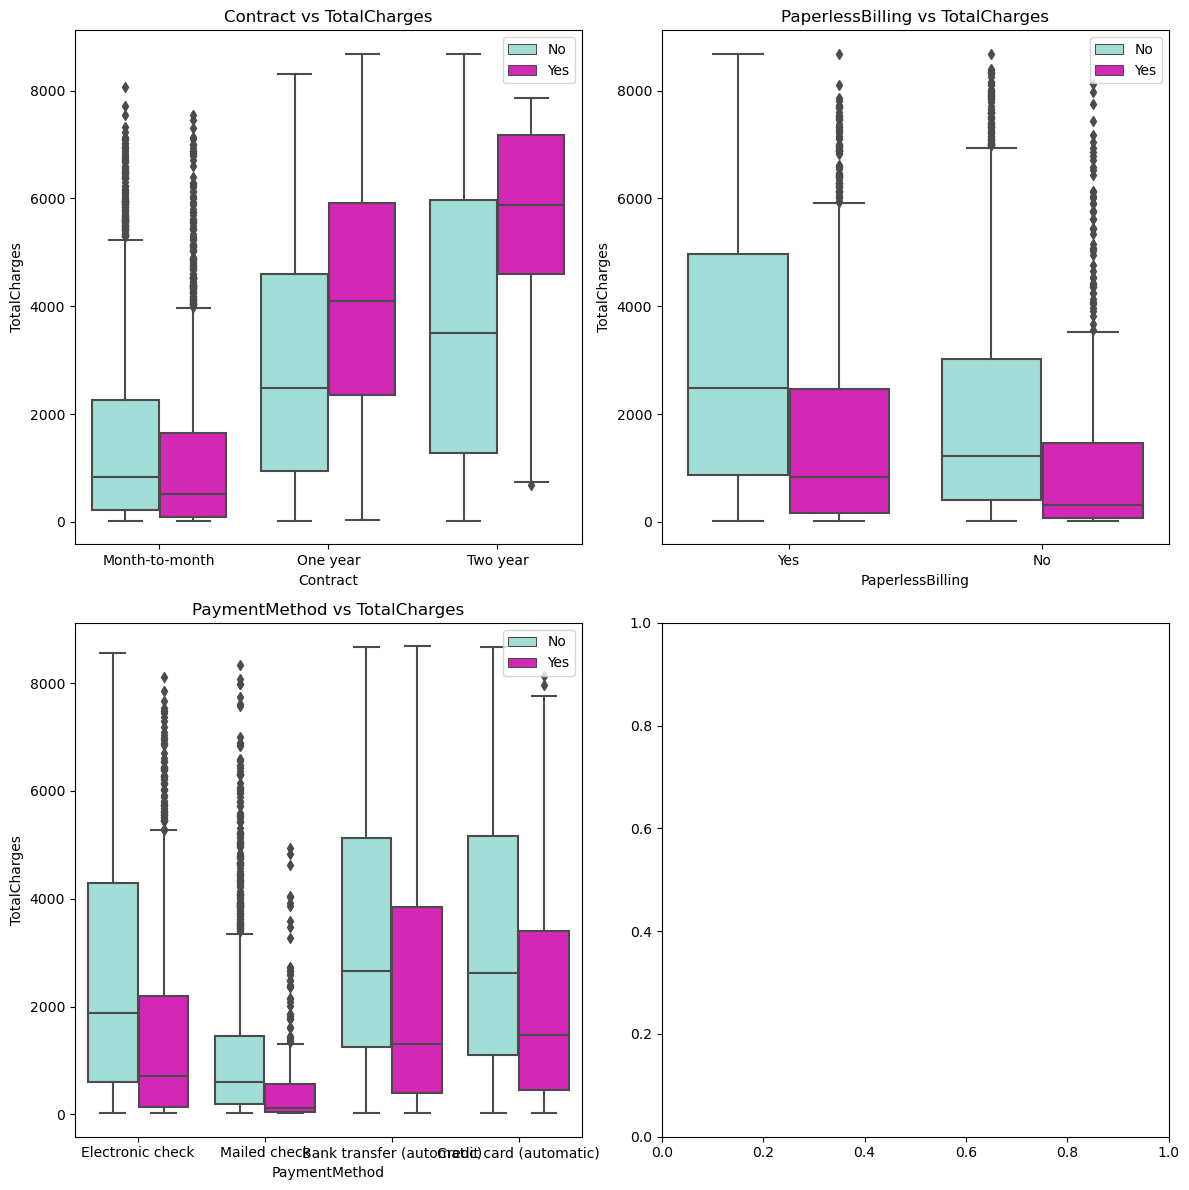

In [45]:
columns = g3
plot_box_by_Totalchar(data, columns)

>- The median values for customers who choose to opt out of services with One year and Two year contracts are relatively high, approximately 4000 and 6000 respectively. In some cases, customers with Two year contracts have paid as much as 7000.
>
>- When it comes to PaymentMethod, customers tend to avoid using Electronic check for payments within the range of 0-2000, preferring Bank transfer (automatic) and Credit Card (automatic) for transactions up to 4000.

In [46]:
df_num = data[numerical_feat]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

>- No outliers in numerical features detected with the IQR method — no adjustments made.

### Numerical features vs Numerical features w.r.t Target variable (Churn) :

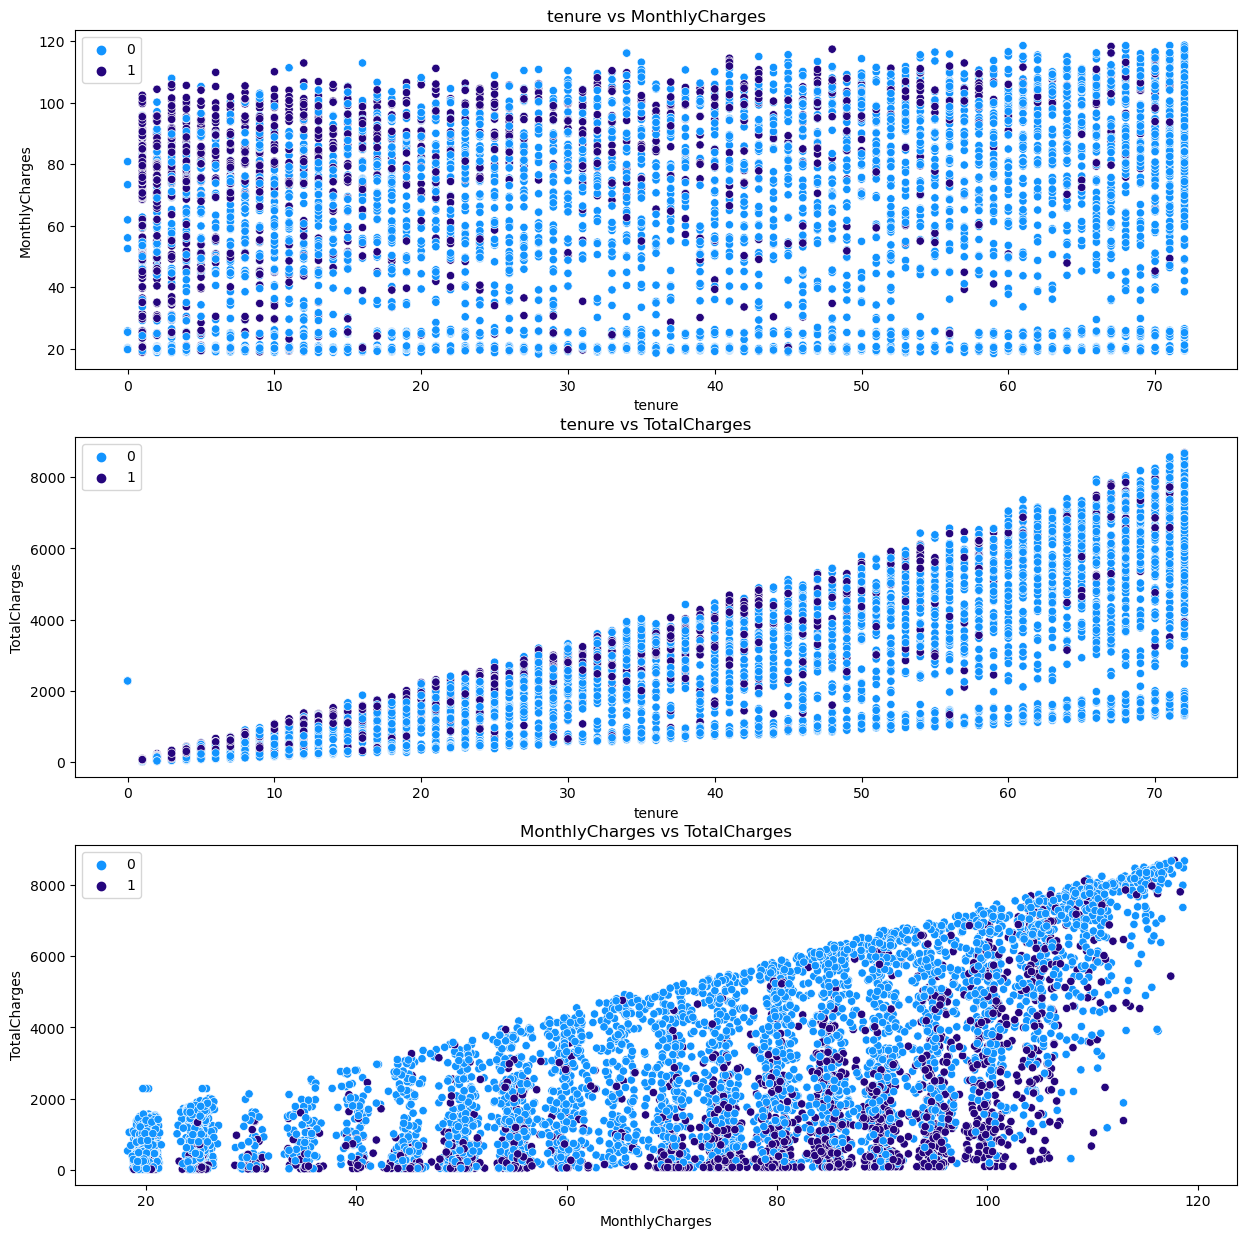

In [47]:
a = 0
fig,ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
colors = ['#1294ff', '#25057d']
for i in range(len(numerical_feat)):
    for j in range (len(numerical_feat)):
        if i !=j and j >i:
            a += 1
            plt.subplot(3,1,a)
            sns.scatterplot(x = numerical_feat[i], y = numerical_feat[j], data = data, hue = "Churn", palette= colors);
            plt.legend(loc = 'upper left',)
            title = numerical_feat[i] + ' vs ' + numerical_feat[j]
            plt.title(title)

>- In the period of 0-20 months, customer churn rates do not appear to be influenced by their MonthlyCharges. However, for tenure periods ranging from 20-60 months, customers at the higher end of the MonthlyCharges spectrum (70-120) are more likely to churn.
>
>- When comparing TotalCharges and tenure, there is a positive correlation between the two variables. Customers who opt out of their plans tend to have the highest TotalCharges during their tenure, while a smaller group of customers who cancel their subscriptions fall in the middle range of TotalCharges.
>
>- It appears that customers are more likely to cancel their subscriptions when their MonthlyCharges reach a value of 70 or above.

## Summary of Data Analysis
> Based on the exploratory data analysis, certain categorical features have been found to be associated with customer churn, with some features demonstrating a clear ordering of values. Specifically, the order of importance for categorical features in predicting churn appears to be: 
>>- gender (male vs. female)
>>- senior citizen status (no senior citizen vs. senior citizen) 
>>- partner status (no partner vs. partner)
>>- dependents (no dependents vs. dependents)
>>- phone service (phone service vs. no phone service)
>>- multiple lines (multiple lines > no multiple lines > no phone service)
>>- internet service (fiber optic > DSL > no internet service)
>>- online security (absent > present > no internet service)
>>- online backup (absent > present > no internet service)
>>- device protection (absent > present > no internet service)
>>- tech support (absent > present > no internet service)
>>- streaming TV (absent > present > no internet service)
>>- streaming movies (absent > present > no internet service)
>>- contract (month-to-month > one year > two year)
>>- paperless billing (present > absent)
>>- payment method (electronic check > mailed check > bank transfer (automatic) > credit card (automatic)).
>
> In addition to categorical features, certain numerical features also appear to be important predictors of churn. The ranges of values for these features are as follows: 
>>- tenure (1-5 months)
>>- monthly charges (65-105)
>>- total charges (0-1000)
>
>Together, these features can be used to identify customers who are at a higher risk of churning and may benefit from targeted interventions to improve customer retention.

# Feature Engineering

In [48]:

features_mms = numerical_feat
df_features_mms = pd.DataFrame(data, columns = features_mms)
df_remaining_features = data.drop(columns = features_mms)

# Model Selection
mms = MinMaxScaler()
# Fitting the Model
rescaled_features = mms.fit_transform(df_features_mms)

df_rescaled_features = pd.DataFrame(rescaled_features, columns = features_mms, index = df_remaining_features.index)

df = pd.concat([df_remaining_features, df_rescaled_features], axis = 1)

### Correlation Matrix :

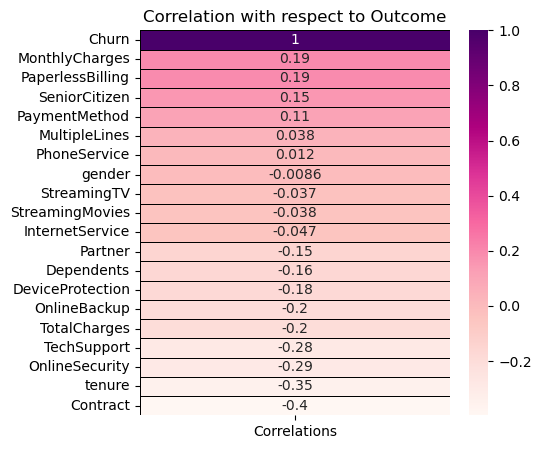

In [49]:
corr = df.corrwith(df.Churn).sort_values(ascending= False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot=True, cmap = "RdPu", linewidths= 0.4, linecolor= 'black');
plt.title("Correlation with respect to Outcome");   


>- Upon analyzing the data, we found that MulipleLines, PhoneService, gender, StreamingTV, StreamingMovies, and InternetService do not exhibit any significant correlation with other features. Therefore, we decided to drop the features with correlation coefficients between -0.1 and 0.1.
>
>- The remaining features, however, show either a strong positive or negative correlation with other features in the dataset.

### Feature Selection for Categorical Features :

#### Chi-Squared Test :

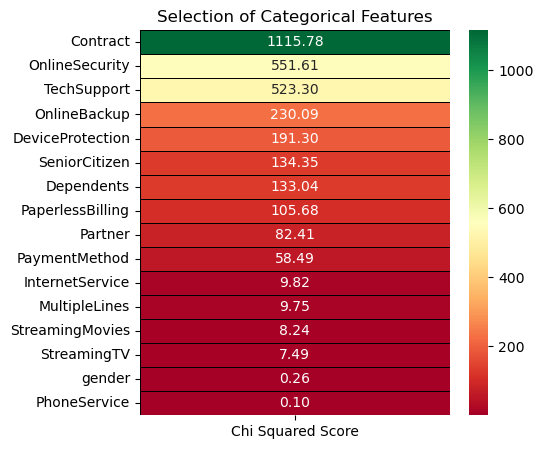

In [50]:
X_chi = df.loc[:,categorical_feat]
y_chi = df.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(X_chi, y_chi)


featureScores = pd.DataFrame(data = fit.scores_,index = list(X_chi.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = 'RdYlGn',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

>- There appears to be a weak correlation between Churn and PhoneService, gender, StreamingTV, StreamingMovies, MultipleLines, and InternetService. 
>
>- These factors do not appear to have a significant impact on whether or not a customer decides to churn.

In [51]:
df.drop(['PhoneService', 'gender', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'InternetService'], axis = 1, inplace = True)
df.head()

SeniorCitizen  Partner  Dependents  OnlineSecurity  OnlineBackup  \
0              0        1           0               0             2   
1              0        0           0               2             0   
2              0        0           0               2             2   
3              0        0           0               2             0   
4              0        0           0               0             0   

   DeviceProtection  TechSupport  Contract  PaperlessBilling  PaymentMethod  \
0                 0            0         0                 1              2   
1                 2            0         1                 0              3   
2                 0            0         0                 1              3   
3                 2            2         1                 0              0   
4                 0            0         0                 1              2   

   Churn    tenure  MonthlyCharges  TotalCharges  
0      0  0.013889        0.115423      0.001275  
1      0  0.472222        0.385075      0.215867  
2      1  0.027778        0.354229      0.010310  
3      0  0.625000        0.239303      0.210241  
4      1  0.027778        0.521891      0.015330

### Feature Selection for Numerical Features :

#### ANOVA Test :

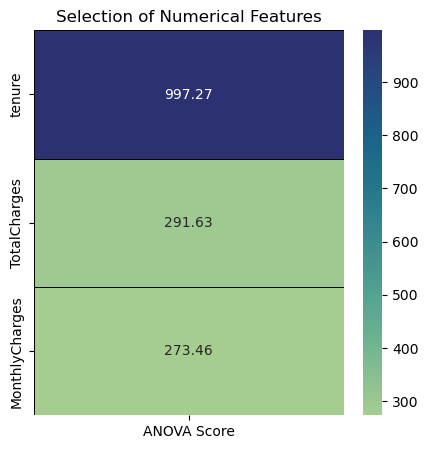

In [52]:
X_ano = df.loc[:,numerical_feat]
y_ano = df.loc[:,"Churn"]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(X_ano,y_ano)

featureScores = pd.DataFrame(data = fit.scores_,index = list(X_ano.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = 'crest',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

>- Based on the results of the ANOVA test, the importance of a feature increases with a higher ANOVA score. Therefore, we can infer that all of the numerical features should be included in the modeling process.

### Data Balancing

In [53]:

# Instantiate SMOTE
smote = SMOTE(random_state=42, sampling_strategy='auto')

X = df.drop('Churn', axis =1)
y = df.Churn

# Apply SMOTE to balance the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the number of records in each class before and after SMOTE
print("Before SMOTE:")
print(y.value_counts())
print('\n')
print("After SMOTE:")
print(y_resampled.value_counts())


Before SMOTE:
0    5174
1    1869
Name: Churn, dtype: int64


After SMOTE:
0    5174
1    5174
Name: Churn, dtype: int64


### Splititng the Data using Train Test split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, random_state=42, test_size=0.2)

In [55]:
X_train.shape

(8278, 13)

In [56]:
X_test.shape

(2070, 13)

### Model Evaluation Metrics

> Various metrics are used to assess the performance of the selected models:
> 
> - **Feature weights:** Indicates the most important features used by the model to generate predictions.
> - **Confusion matrix:** Displays a grid of true and false predictions compared to the actual values.
> - **Accuracy score:** Shows the overall accuracy of the model for both training and test sets.
> - **ROC Curve:** Displays the diagnostic ability of a model by plotting true positive rate (TPR) against false positive rate (FPR) for different thresholds of class predictions, such as thresholds of 10%, 50%, or 90% resulting in a prediction of churn.
> - **AUC (for ROC):** Measures the overall separability between classes of the model in relation to the ROC curve.
> - **Precision-Recall Curve:** Displays the diagnostic ability by comparing false positive rate (FPR) and false negative rate (FNR) for different thresholds of class predictions. This metric is suitable for data sets with high class imbalances (i.e., negative values are overrepresented) as it focuses on precision and recall, which are not dependent on the number of true negatives and thus exclude the imbalance.
> - **F1 Score:** Measures the harmonic mean of precision and recall and provides a balance between both metrics.
> - **AUC (for PRC):** Measures the overall separability between classes of the model in relation to the Precision-Recall curve.

In [57]:
# Defining a function that plots the feature weight for a classifier.

def feature_weight(X_df, classifier, classifier_name):
    
    # Creating a pandas series of feature weights and sorting them in descending order.
    weights = pd.Series(classifier.coef_[0], index = X_df.columns.values).sort_values(ascending=False)
    
    # Creating a figure with 2 subplots for top and bottom feature weights.
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    
    # Selecting the top 5 features and plotting them in a bar chart on subplot 1.
    top_weights_selected = weights[:5]
    plt.tick_params(labelsize = 10)
    axes[0].set_title(f'{classifier_name} - Top 5 Features')
    top_weights_selected.plot(kind = 'bar', ax = axes[0])
    
    # Selecting the bottom 10 features and plotting them in a bar chart on subplot 2.
    bottom_weights_selected = weights[-10:]
    plt.tick_params(labelsize = 10)
    axes[1].set_title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind = 'bar', ax = axes[1])
    
    # Returning empty print statement to indicate the end of the function.
    return print("")


In [58]:
# Define a function that plot the confusion matrix for a classifier and the train and test accuracy.

def confusion_matrix_plot (X_train, y_train ,X_test, y_test, classifier, y_pred, classifier_name):
    # Compute predictions on the test set
    y_pred = classifier.predict(X_test)
    
    # Plot the confusion matrix
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, ax=axes[0]) 
    plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=axes[1])
    axes[0].set_title(f"{classifier_name} - Confusion Matrix")
    axes[1].set_title(f"{classifier_name} - Normalized Confusion Matrix")

    # Display the test and train accuracy scores
    test_acc = accuracy_score(y_test, y_pred)
    train_acc = classifier.score(X_train, y_train)
    print(f"Test Accuracy: {test_acc:.3f}")
    print(f"Train Accuracy: {train_acc:.3f}")

    return None


In [59]:
# Define a function that plots the ROC curve and the AUC score.

def plot_roc_auc(X_test, y_test, y_pred_probabilities, classifier_name):
    # Obtain the predicted probabilities for the positive class
    
    y_pred_prob = y_pred_probabilities[:,1]

    # Compute the false positive rate, true positive rate and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Plot the ROC curve
    plt.subplots(1,figsize=(6,5))
    plt.plot([1, 0], [1, 0], 'k--')
    plt.plot(fpr, tpr, label = f'{classifier_name}')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{classifier_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Compute and print the AUC score
    auc_score = roc_auc_score(y_test, y_pred_prob)
    print(f'AUC Score (ROC): {auc_score:.4f}\n')

    return auc_score
    

In [60]:
# Define a function that plots the precision-recall-curve and the F1 Score and AUC Score.

def precision_recall_curve_and_score(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test,y_pred_prob)
    
    plt.plot(recall, precision, label = f'{classifier_name}')
    plt.xlabel("Reccall")
    plt.ylabel("Precision")
    plt.title(f'{classifier_name} - Precision_Recall Curve')
    plt.show()
    
    f1_score_result = f1_score(y_test, y_pred)
    auc_score_result =  auc(recall, precision)
    print(f"F1 Score : {f1_score_result:.4f} \n")
    print(f"AUC Score (PR) : {auc_score_result:.4f}\n")
    
    return None

# Model Selection

### K-Nearest Neighbors (KNN)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [63]:
y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

Test Accuracy: 0.792
Train Accuracy: 0.848


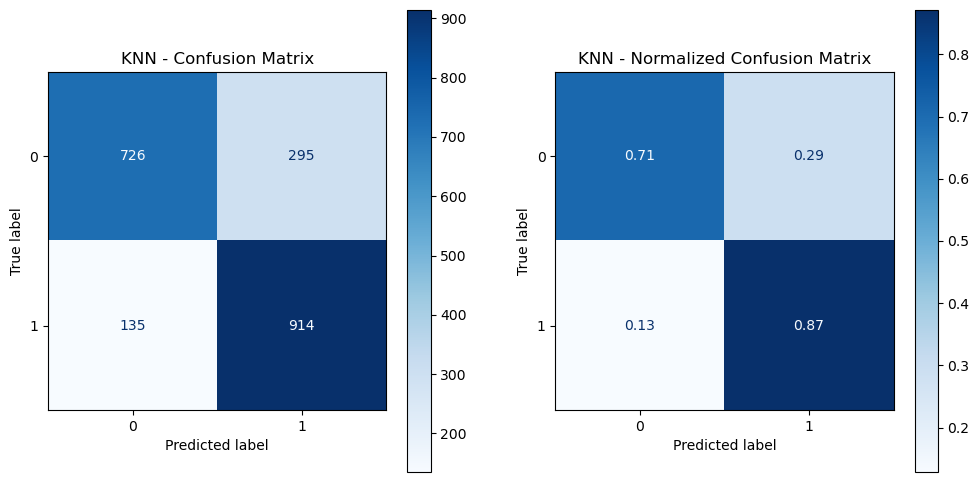

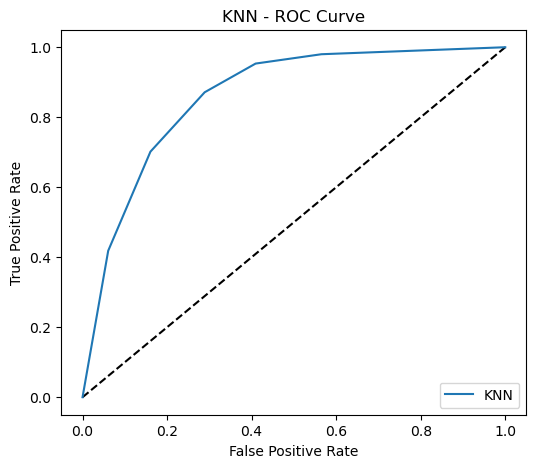

AUC Score (ROC): 0.8605



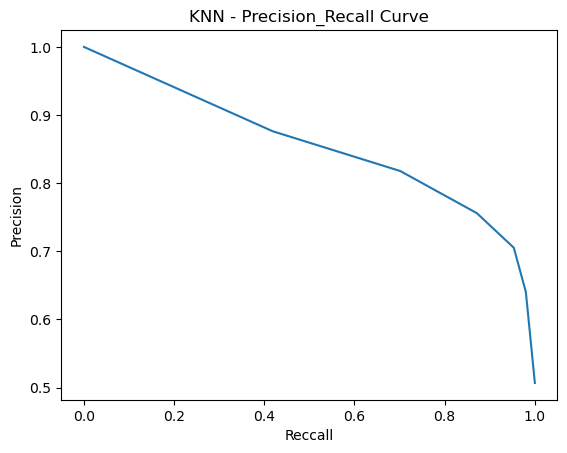

F1 Score : 0.8096 

AUC Score (PR) : 0.8553



In [64]:
confusion_matrix_plot(X_train, y_train,X_test, y_test, knn, y_pred_knn, 'KNN')
plot_roc_auc(X_test, y_test, y_pred_knn_prob, 'KNN')
precision_recall_curve_and_score (X_test, y_test, y_pred_knn, y_pred_knn_prob, 'KNN')

### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression 

In [66]:
logre = LogisticRegression(max_iter=100)
logre.fit(X_train,y_train)

LogisticRegression()

In [67]:
y_pred_logre = logre.predict(X_test)
y_pred_logre_prob = logre.predict_proba(X_test)


Test Accuracy: 0.786
Train Accuracy: 0.775


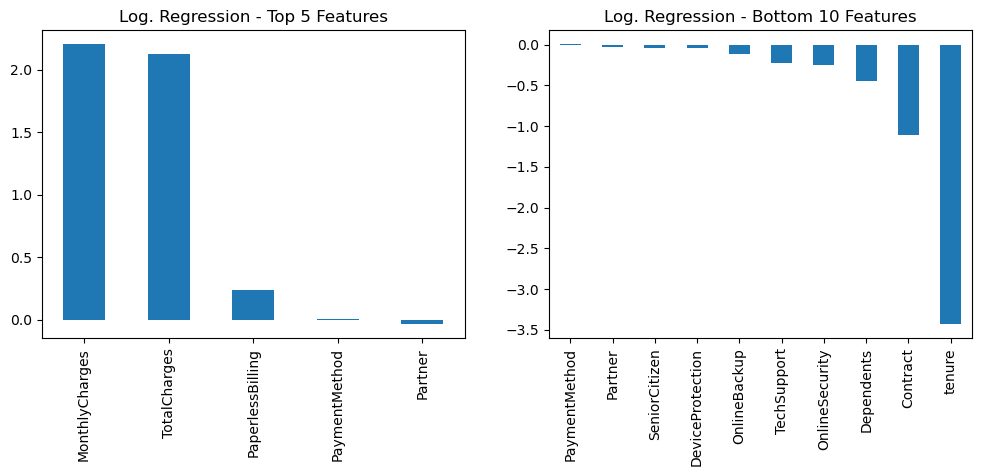

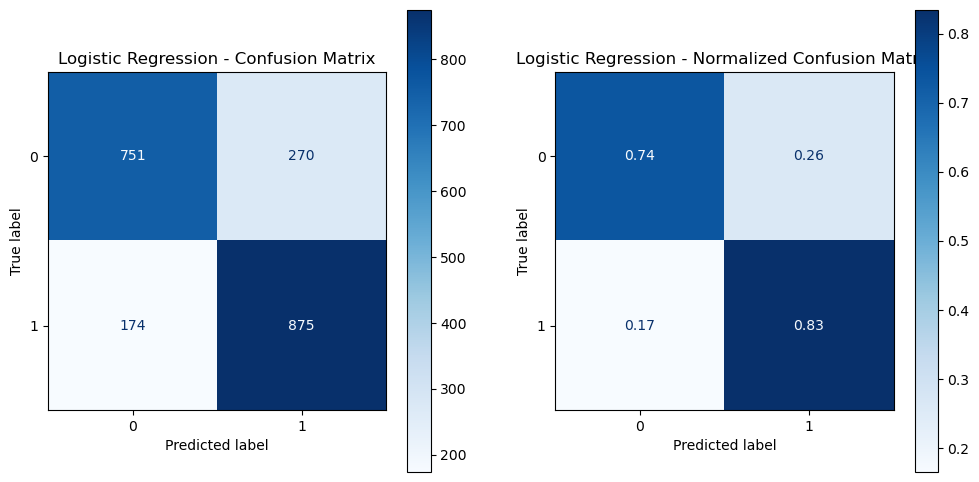

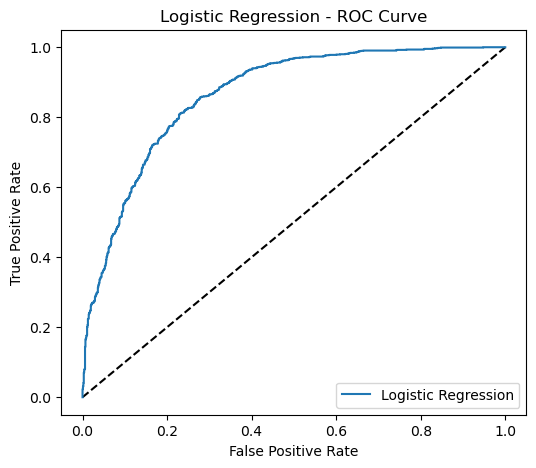

AUC Score (ROC): 0.8650



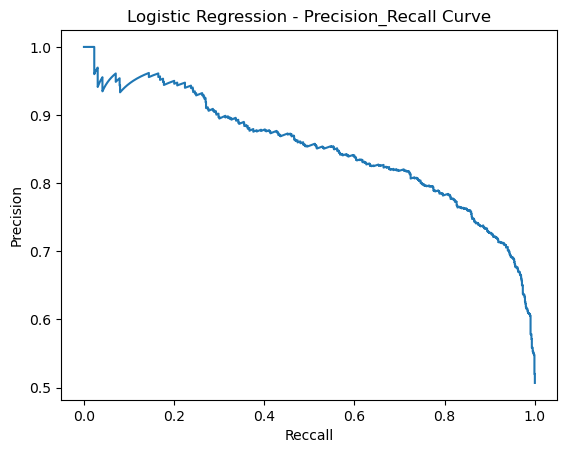

F1 Score : 0.7976 

AUC Score (PR) : 0.8505



In [68]:
feature_weight(X, logre, 'Log. Regression')
confusion_matrix_plot(X_train, y_train, X_test, y_test, logre, y_pred_logre, 'Logistic Regression')
plot_roc_auc(X_test, y_test, y_pred_logre_prob, 'Logistic Regression')
precision_recall_curve_and_score(X_test, y_test, y_pred_logre, y_pred_logre_prob, 'Logistic Regression')

### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

Test Accuracy: 0.787
Train Accuracy: 0.793


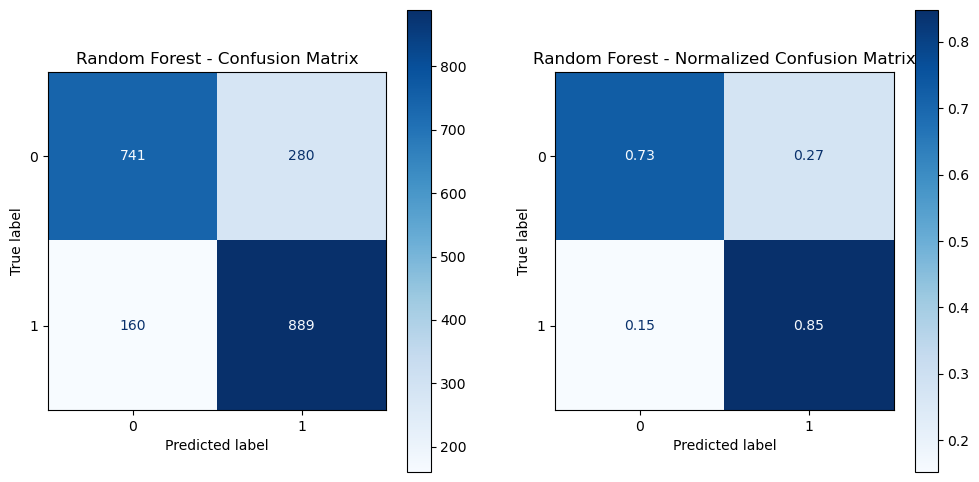

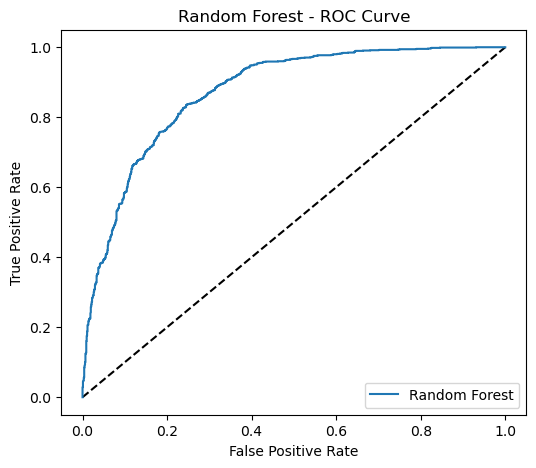

AUC Score (ROC): 0.8721



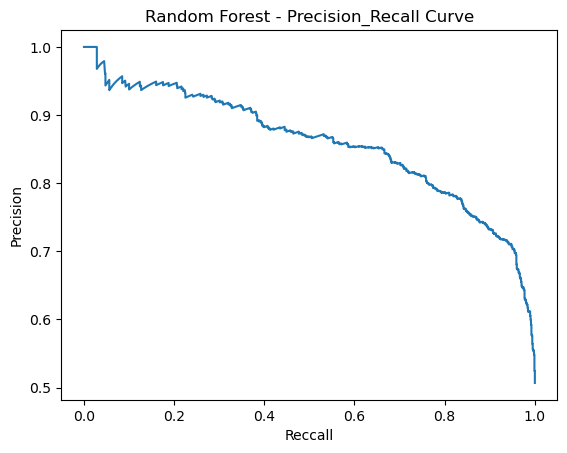

F1 Score : 0.8016 

AUC Score (PR) : 0.8583



In [70]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, rf, y_pred_rf, "Random Forest")
plot_roc_auc (X_test, y_test, y_pred_rf_prob, "Random Forest")
precision_recall_curve_and_score (X_test, y_test, y_pred_rf, y_pred_rf_prob, "Random Forest")

### Support Vector Machine

In [71]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train,y_train)

y_pred_svm = svm.predict(X_test)
y_pred_svm_prob = svm.predict_proba(X_test)

Test Accuracy: 0.787
Train Accuracy: 0.793


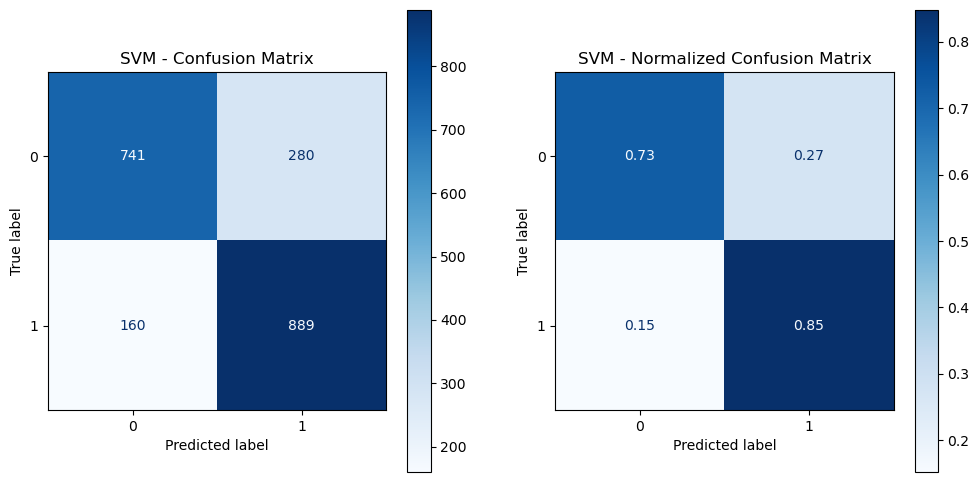

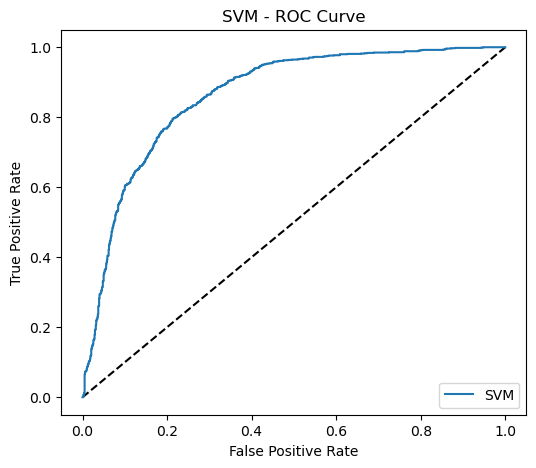

AUC Score (ROC): 0.8625



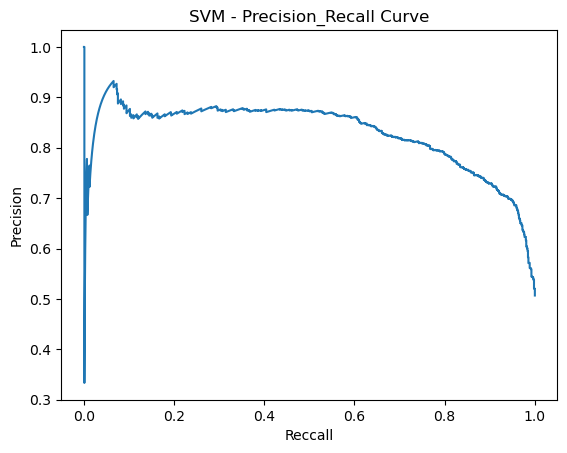

F1 Score : 0.7986 

AUC Score (PR) : 0.8280



In [72]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, rf, y_pred_svm, "SVM")
plot_roc_auc (X_test, y_test, y_pred_svm_prob, "SVM")
precision_recall_curve_and_score (X_test, y_test, y_pred_svm, y_pred_svm_prob, "SVM")

### Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dsclass = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
dsclass.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1000)

In [75]:
y_pred_dsclass = dsclass.predict(X_test)
y_pred_dsclass_prob = dsclass.predict_proba(X_test)

Test Accuracy: 0.771
Train Accuracy: 0.766


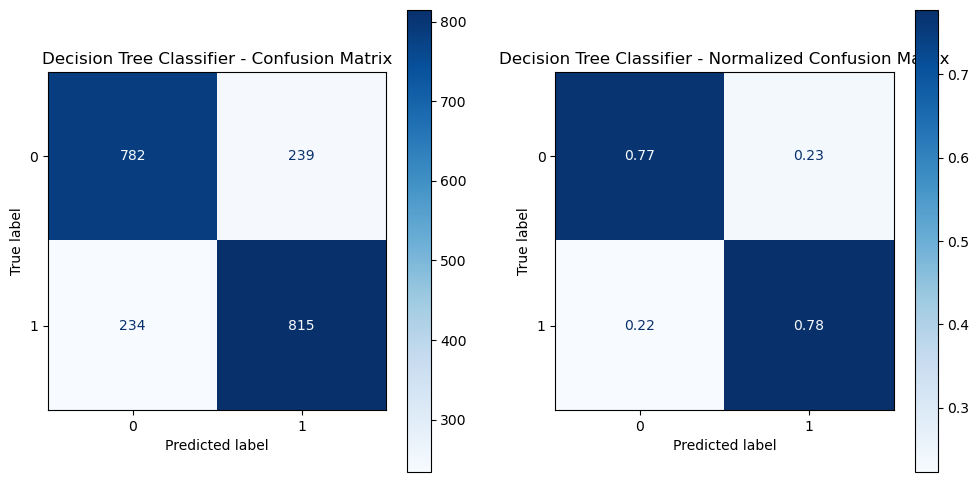

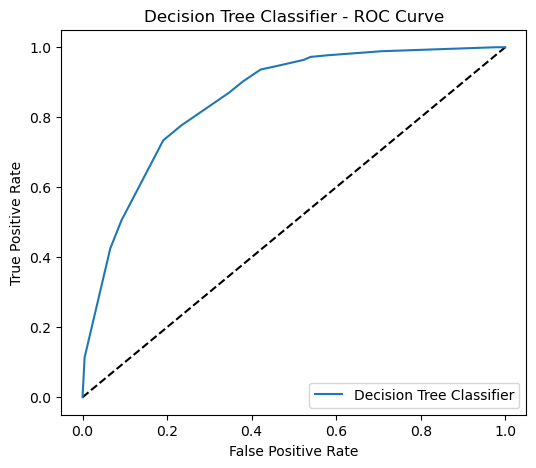

AUC Score (ROC): 0.8513



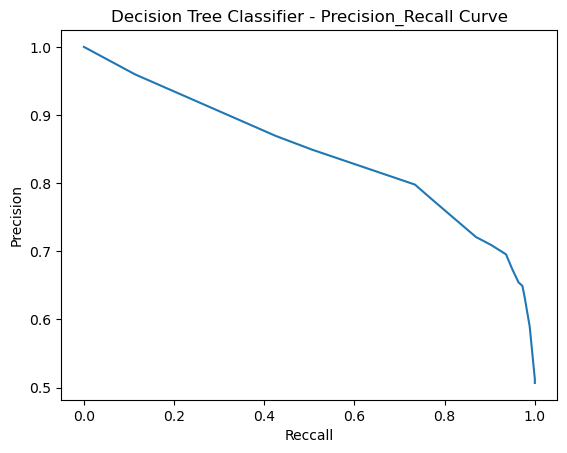

F1 Score : 0.7751 

AUC Score (PR) : 0.8442



In [76]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, dsclass, y_pred_dsclass, "Decision Tree Classifier")
plot_roc_auc (X_test, y_test, y_pred_dsclass_prob, "Decision Tree Classifier")
precision_recall_curve_and_score (X_test, y_test, y_pred_dsclass, y_pred_dsclass_prob, "Decision Tree Classifier")

### XG Boost

In [77]:
from xgboost import XGBClassifier

In [78]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [79]:
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_prob = xgb.predict_proba(X_test)

Test Accuracy: 0.822
Train Accuracy: 0.928


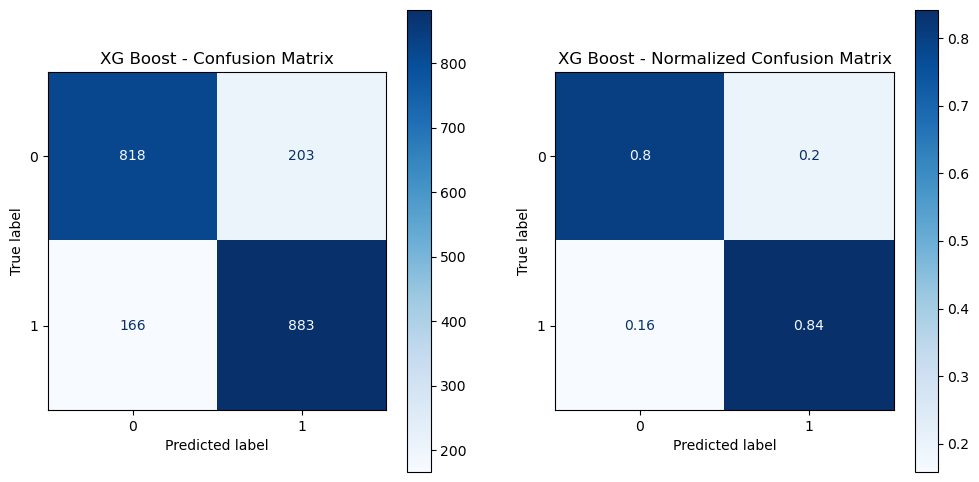

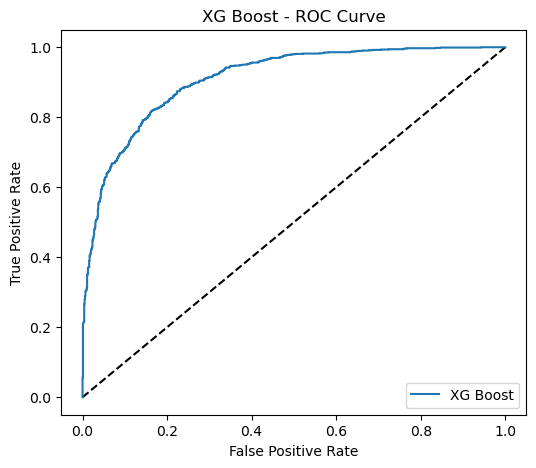

AUC Score (ROC): 0.9098



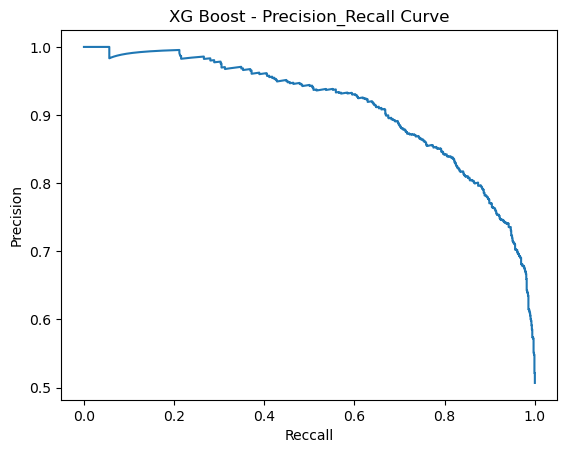

F1 Score : 0.8272 

AUC Score (PR) : 0.9113



In [80]:
confusion_matrix_plot(X_train, y_train, X_test, y_test, xgb, y_pred_xgb, "XG Boost")
plot_roc_auc (X_test, y_test, y_pred_xgb_prob, "XG Boost")
precision_recall_curve_and_score (X_test, y_test, y_pred_xgb, y_pred_xgb_prob, "XG Boost")

In [81]:
from joblib import dump
dump(xgb,"Telco_Customer_Churn.joblib")

['Telco_Customer_Churn.joblib']

In [82]:
import pickle
pickle.dump(xgb,open('model.sav','wb'))